## Latar Belakang

Sebuah Supermarket sedang menganalisis efektifitas dari campaign yang telah mereka lakukan untuk meningkatkan daya beli customers pada produk wine. Berdasarkan campaign pertama hingga campaign terakhir yang telah mereka lakukan, campaign terakhir terlihat lebih baik dari campaign-campaign sebelumnya dimana campaign kedua merupakan campaign terburuk yang mereka lakukan. Untuk itu, perusahaan meminta bantuan data analyst untuk menyusun strategi campaign yang akan mereka lakukan pada campaign selanjutnya sehingga next campaign yang dilakukan bisa sesuai target dan mampu meningkatkan penjualan produk wine.

## Rumusan Masalah

Berdasarkan latar belakang diatas, kita dapat merumuskan beberapa pernyataan atau rumusan masalah yang relevan untuk analisis data. Beberapa di antaranya yaitu:
1. Apakah kampanye yang telah dilakukan sudah efektif dalam menjangkau pelanggan?
2. Apakah kampanye yang dilakukan mampu meningkatkan pembelian pelanggan?
3. Bagaimana efektifitas kampanye terhadap distribusi pembelian?
4. Bagaimana rekomendasi yang akan diberikan pada kampanye selanjutnya?

## Goals

1. Mengetahui perubahan ke arah ideal berdasarkan estimasi peluang pelanggan yang akan menerima kampanye selanjutnya
2. Mengetahui estimasi berapa persen selisih pelanggan yang menerima kampanye pada kondisi sekarang dan kondisi ideal

## Data

Untuk menjawab pertanyaan di atas, kita akan menganalisa data yang sudah dikumpulkan. Namun sebelum itu tahap pertama yang akan kita lakukan adalah memahami data yang sudah diberikan lalu melakukan data cleaning jika diperlukan.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm
import plotly.express as px
import re
from scipy.stats import iqr
from unidecode import unidecode
from scipy.stats import normaltest

In [2]:
df=pd.read_csv('Supermarket Customers.csv', sep= '\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Dataset ini berisi berbagai informasi ketika pelanggan melakukan pendaftaran sebagai member di Supermarket. Ada banyak informasi penting tentang pelanggan seperti Pendidikan Pelanggan, Status Pernikahan, Pendapatan, Jumlah anak, Waktu pembelian terakhir, Respons pelanggan terhadap kepuasan, dan berbagai jenis produk serta kampanye promosi yang dilakukan oleh perusahaan dalam meningkankan pembelian pelanggan.

Berikut merupakan 29 kolom serta penjelasannya yang ada dalam dataset ini:

#### 1. PEOPLE
* ID:  Pengidentifikasi unik pelanggan
* Year_Birth: Tahun lahir Pelanggan
* Education:: Tingkat pendidikan pelanggan
* Marital_Status: Status perkawinan pelanggan
* Income: Pendapatan rumah tangga tahunan pelanggan
* Kidhome:  Jumlah anak dalam rumah tangga pelanggan
* Teenhome: Jumlah remaja dalam rumah tangga pelanggan
* Dt_Customer: Tanggal pendaftaran pelanggan di perusahaan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

#### 2. PRODUCTS
* MntWines: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir
* MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
* MntMeatProducts: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir
* MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir
* MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
* MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

#### 3. PROMOTION
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1: 1 jika pelanggan menerima penawaran pada kampanye pertama, 0 sebaliknya
* AcceptedCmp2: 1 jika pelanggan menerima penawaran pada kampanye kedua, 0 sebaliknya
* AcceptedCmp3: 1 jika pelanggan menerima tawaran pada kampanye ke-3, 0 sebaliknya
* AcceptedCmp4: 1 jika pelanggan menerima tawaran pada kampanye ke-4, 0 sebaliknya
* AcceptedCmp5: 1 jika pelanggan menerima tawaran pada kampanye ke-5, 0 sebaliknya
* Response: 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 sebaliknya

#### 4. PLACE
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui website perusahaan
* NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan dalam sebulan terakhir
***

## Data Understanding dan Data Cleaning

Pada tahap ini kita perlu memahami data yang kita miliki secara mendalam, sehingga jika terdapat anomali pada data yang kita miliki, kita perlu melakukan pembersihan data pada *Data Cleaning*, Setiap tindakan yang dilakukan untuk mengatasi anomali akan disertai dengan penjelasan mengenai alasan di balik langkah-langkah yang diambil, baik itu berdasarkan pengetahuan domain maupun analisis statistik.

Pertama, mari kita lihat informasi dari dataset Supermarket Customers.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


## Unique Value

In [5]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Secara umum, kita dapat merangkum beberapa poin penting mengenai dataset `Supermarket Customers` sebagai berikut:
***
* Dataset ini terdiri dari 29 kolom dan 2240 baris.
* Kolom `ID` berisi id unik untuk setiap pelanggan dan tidak memiliki relevansi dalam analisis, sehingga bisa dihapus.
* Kolom `Year_Birth` berisi tahun kelahiran pelanggan, dalam kolom ini ada 3 inputan berisi 1893,1899,1900. Dimana artinya kemungkinan ada kesalahan input saat pendaftaran customer. Hal ini akan kita lihat lagi kedepannya akankah berpengaruh terhadap data yang kita olah (opsional).
* Pada kolom `Education`, ada 3 value yang kurang dimengerti oleh khalayak umum yaitu Graduation, Basic dan 2n Cycle. berdasarkan riset yang ada Graduation bisa dikategorikan sebagai kalangan Bachelor, Basic adalah kalangan pendidikan dasar atau High School, dan 2n Cycle kalangan Master.
* Pada Kolom `Marital_Status` terdapat status Single, Alone, Absurd, YOLO yang akan digabung menjadi Single. Together dan Married digabung menjadi Married. Divorced dan Widow digabung menjadi Divorced sehingga status pernikahan pelanggan dapat dikelompokkan menjadi "Single," "Married," dan "Divorced."
* Kolom `Income` memiliki 24 data kosong yang diwakili oleh NaN. Selain itu, terdapat anomali data dengan nilai maksimal 666.666 yang kemungkinan merupakan kesalahan input, sehingga perlu dihapus.
* Kolom `Kidhome` dan `Teenhome` lebih baik digabung saja sebagai kolom baru bernama `Children`.
* Ada tiga kolom dengan tipe data objek, namun kolom `Dt_Customer` kurang relevan sebagai objek sehingga perlu diubah menjadi tipe data datetime.
* Kolom `Z_CostContact` dan `Z_Revenue` tidak memiliki penjelasan dalam dokumen PDF, dan hanya memiliki satu nilai, sehingga diasumsikan tidak relevan dan dapat dihapus.
* Kolom `Recency`, `NumDealsPurchases`, `NumWebVisitsMonth` dan `Complain` akan dihapus karena tidak ada relevandi dalam data analisis.
* Kolom `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` akan dihapus karena tidak ada relevansi dalam analisis.
* Kolom `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2` merupakan kolom dari jenis-jenis kampanye promosi yang dilakukan oleh Supermarket dan akan diubah menjadi nama kolom baru yang lebih mudah dipahami.
***

## Missing Value

In [6]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [7]:
df_missing = df[df['Income'].isna()]
index_missing = df[df['Income'].isna()].index

display(df_missing, index_missing)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,  312,
        319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081, 2084, 2228],
      dtype='int64')

<Axes: >

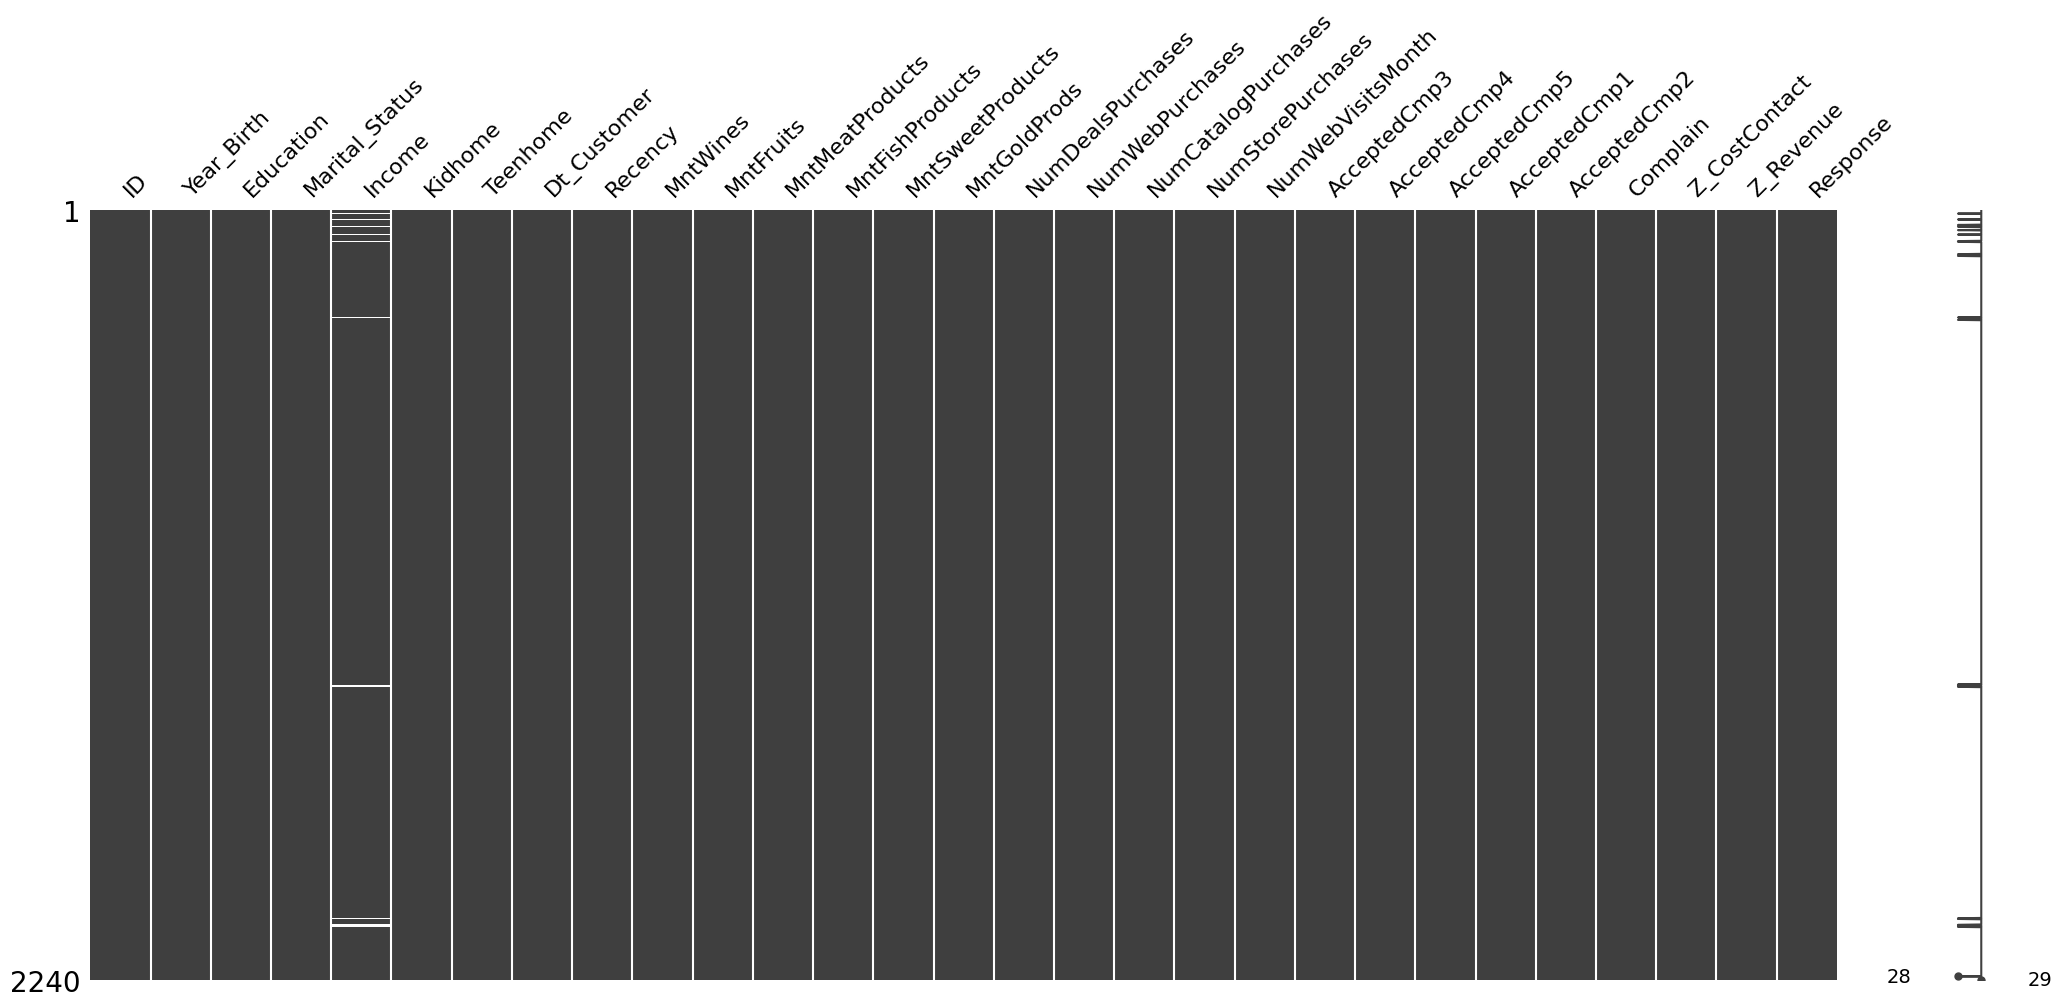

In [8]:
import missingno
missingno.matrix(df)

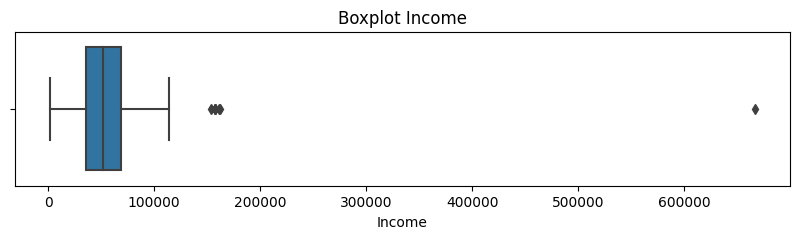

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0


In [9]:
#Melihat distribusi data dari kolom Income
plt.figure(figsize=(10,2))
plt.title('Boxplot Income')
sns.boxplot(x=df.Income)
plt.show()
display(df['Income'].describe().reset_index().transpose())

## Deal with missing values
Dari boxplot bisa dilihat ada beberapa outliers, untuk data yang masuk dalam kategori outliers dicari dengan IQR.<br>
IQR = Q3 - Q1 = 68522 - 35303 = **33219**<br>
Batas atas = Q3 + (1.5 x IQR) = 68522 + (1.5 X 33219) = **118350.5**<br>
Batas bawah = Q1 + (1.5 x IQR) = 35303 - (1.5 X 33219) = **-14525.5**<br>
Karena tidak ada data pada kolom *Income* bernilai negatif, maka nol digunakan sebagai batas bawah, sehingga rentang batas data yang bukan outliers adalah **0** hingga **118350.5**<br><br>

Untuk mengetahui distribusi dengan lebih baik, maka data outliers akan dihilangkan saat melakukan analisis dan dikembalikan lagi setelah analisis agar volume dataframe tetap utuh.<br><br>

Berdasatkan penjelasan dari [sini](https://www.scribbr.com/statistics/missing-data/), terdapat tiga cara untuk memperbaiki *missing value*, yaitu dibiarkan tanpa data, dihapus dari dataframe, dan diganti dengan data yang relevan. Untuk mempertahankan agar dataframe tetap utuh, maka pilihan terbaik adalah mengganti data yang kosong dengan data yang relevan, untuk kasus ini *mean* atau *median* dari kolom yang sama.<br><br>

Dengan nilai p-value dibawah 5% maka reject Ho, data tidak terdistribusi normal. Dikarenakan data pada kolom Income tidak terdistribusi normal, data yang kosong pada kolom ini akan diisi dengan nilai median dari kolom *Income*, karena *measure of central tendency* yang tepat adalah median.

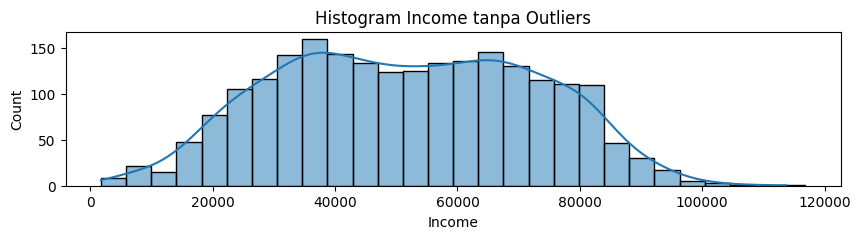

Jumlah outliers : 8


In [10]:
#Membuat plot histogram dari kolom income tanpa outliers
IncomeNoOutliers = df[(df['Income']>=0) & (df['Income']<=118350.5)].reset_index()
plt.figure(figsize=(10,2))
plt.title('Histogram Income tanpa Outliers')
sns.histplot(x=IncomeNoOutliers.Income, kde=True, binwidth=4112)
plt.show()
print('Jumlah outliers : {}'.format(df['Income'].count()-IncomeNoOutliers['Income'].count()))

In [11]:
from scipy import stats

stats, pval=normaltest(IncomeNoOutliers['Income'])
print('p-value = {}'.format(pval))
if pval<=0.05:
    print('Tidak terdistribusi normal') #Ha
else: 
    print('Distribusi normal') #Ho

p-value = 5.2535220730746056e-51
Tidak terdistribusi normal


In [12]:
#Mengisi nilai yang kosong pada kolom Income dengan nilai median
df['Income'].fillna(value = IncomeNoOutliers['Income'].median(numeric_only=True), inplace = True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Replace Value and Data Type

Pada kolom `Education`, ada 3 value yang kurang dimengerti oleh khalayak umum yaitu Graduation, Basic dan 2n Cycle. berdasarkan riset yang ada Graduation bisa dikategorikan sebagai kalangan Bachelor, Basic adalah kalangan High School, dan 2n Cycle kalangan Master. Sehingga kita perlu menyatukan beberapa value yang dianggap sama atau setara.
***

In [13]:
# mereplace value yang dianggap sama
df['Education'] = df['Education'].replace({
         'Graduation' : 'Bachelor',
         'Basic' : 'High School',
         '2n Cycle' : 'Master'
})

df['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'High School'], dtype=object)

Pada Kolom `Marital_Status` terdapat status Single, Alone, Absurd, YOLO yang akan digabung menjadi Single. Together dan Married digabung menjadi Married. Divorced dan Widow digabung menjadi Divorced sehingga status pernikahan pelanggan dapat dikelompokkan menjadi "Single," "Married," dan "Divorced."

In [14]:
df['Marital_Status'] = df['Marital_Status'].replace({
         'YOLO': 'Single',
         'Absurd' : 'Single',
         'Alone' : 'Single',
         'Together':'Married',
         'Widow':'Divorced'
})

df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Pada Kolom `Marital_Status` terdapat status Single, Alone, Absurd, YOLO yang akan digabung menjadi Single. Together dan Married digabung menjadi Married. Divorced dan Widow digabung menjadi Divorced sehingga status pernikahan pelanggan dapat dikelompokkan menjadi "Single," "Married," dan "Divorced."

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace({
         'YOLO': 'Single',
         'Absurd' : 'Single',
         'Alone' : 'Single',
         'Together':'Married',
         'Widow':'Divorced'
})

df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Pada kolom `Kidhome` dan `Teenhome` sama-sama merupakan kolom yang berisi jumlah anak yang tinggal bersama orang tua. Ada baiknya jika kolom tersebut digabungkan saja dan dibuat sebagai kolom baru bernama `Children`.

In [16]:
# menggabungkan kolom Kidhome dan Teenhome menjadi kolom Children
df['Children'] = df['Kidhome'] + df['Teenhome']

#menghapus kolom Kidhome dan Teenhome
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

## Rename Columns

In [17]:
df.rename(columns = {'MntWines':'Wines',
                     'AcceptedCmp3':'Campaign3', 'AcceptedCmp4':'Campaign4', 'AcceptedCmp5':'Campaign5',
                     'AcceptedCmp1':'Campaign1','AcceptedCmp2':'Campaign2','Response':'Last_Campaign',
                     'NumWebPurchases':'Web_Purchases', 'NumCatalogPurchases':'Catalog_Purchases', 'NumStorePurchases':'Store_Purchases'}, inplace=True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,MntFruits,MntMeatProducts,...,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Z_CostContact,Z_Revenue,Last_Campaign,Children
0,5524,1957,Bachelor,Single,58138.0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Bachelor,Single,46344.0,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Bachelor,Married,71613.0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Bachelor,Married,26646.0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,13-06-2013,46,709,43,182,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Married,64014.0,10-06-2014,56,406,0,30,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Bachelor,Divorced,56981.0,25-01-2014,91,908,48,217,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Married,69245.0,24-01-2014,8,428,30,214,...,0,0,0,0,0,0,3,11,0,1


## Converting the age to datetime and creating age groups

In [18]:
#mengubah kolom Dt_Customer ke DateTime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format= '%Y')

In [19]:
df['Customer_Age'] = (df['Dt_Customer'].dt.year) - (df['Year_Birth'].dt.year)

In [20]:
df['Customer_Age'].describe()

count    2240.000000
mean       44.222321
std        12.022855
min        16.000000
25%        36.000000
50%        43.000000
75%        54.000000
max       121.000000
Name: Customer_Age, dtype: float64

In [21]:
# Membuat kolom 'Age_Group' berdasarkan rentang usia
df['Age_Group'] = pd.cut(x=df['Customer_Age'], bins=[13, 18, 59, 130], labels=['Remaja', 'Dewasa', 'Tua'])

print(df['Age_Group'].unique())

['Dewasa', 'Tua', 'Remaja']
Categories (3, object): ['Remaja' < 'Dewasa' < 'Tua']


## Classify by income

Pada kolom `Income` saya akan mengubah values nya berdasarkan klasifikasi yang terbagi menjadi tiga bagian yaitu `lower-income`, `middle-income`, dan `upper-income`. Pengklasifikasian ini akan mengacu pada [click here](https://www.weforum.org/agenda/2022/07/household-income-distribution-wealth-inequality-united-states/)

- lower-income: < $52000
- middle-income: $52000 - $156000
- upper-income: > $156000

Sebelum masuk pada tahap pengklasifikasian, saya akan melakukan pengecekan outlier terlebih dahulu, jika terdapat outlier yang sangat signifikan pada kolom `Income` saya akan melakukan drop pada data outlier tersebut, sehingga data yang kita gunakan untuk kebutuhan analisis lebih representatif.

C:\Users\user\AppData\Local\Temp\ipykernel_14000\3355608049.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


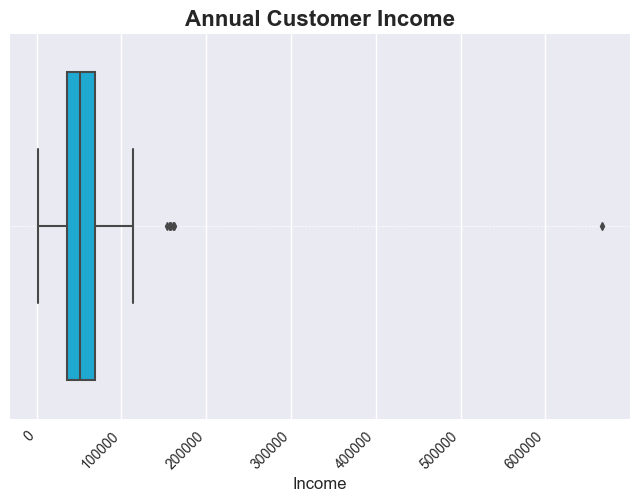

In [22]:
plt.style.use('seaborn')
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Income', color='#01baef', linewidth=1.5, fliersize=4)
plt.title('Annual Customer Income', fontsize=16, fontweight='bold')
plt.xlabel('Income', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [23]:
df['Income'].max()

666666.0

In [24]:
df[df['Income']==666666]

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Wines,MntFruits,MntMeatProducts,...,Campaign5,Campaign1,Campaign2,Complain,Z_CostContact,Z_Revenue,Last_Campaign,Children,Customer_Age,Age_Group
2233,9432,1977-01-01,Bachelor,Married,666666.0,2013-06-02,23,9,14,18,...,0,0,0,0,3,11,0,1,36,Dewasa


In [25]:
df.drop(2233, axis=0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_14000\3355608049.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


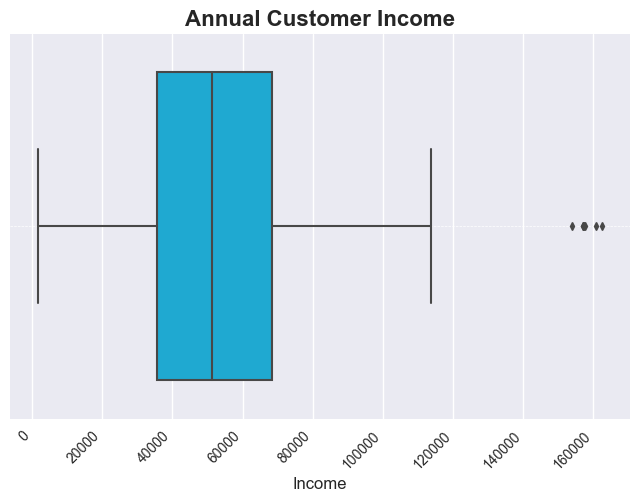

In [26]:
plt.style.use('seaborn')
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Income', color='#01baef', linewidth=1.5, fliersize=4)
plt.title('Annual Customer Income', fontsize=16, fontweight='bold')
plt.xlabel('Income', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [27]:
Class = []

for i in df['Income']:
    if i < 52000:
        Class.append('lower-income')
    elif i > 156000:
        Class.append('upper-income')
    else:
        Class.append('middle-income')

df['Class_income'] = Class
print('Kolom baru bernama \'Class_income\' berhasil ditambahkan')

Kolom baru bernama 'Class_income' berhasil ditambahkan


In [28]:
df['Class_income'].unique()

array(['middle-income', 'lower-income', 'upper-income'], dtype=object)

## Drop Data

* Kolom `ID` berisi id unik untuk setiap pelanggan dan tidak memiliki relevansi dalam analisis, sehingga dapat dihapus. 
* Kolom `Z_CostContact` dan `Z_Revenue` tidak memiliki penjelasan dalam dokumen PDF, dan hanya memiliki satu nilai, sehingga diasumsikan tidak relevan dan dapat dihapus.
* Kolom `Income` yang memiliki values berupa penghasilan pelanggan juga akan saya hapus karena sudah ada kolom baru bernama `Class_income` yang akan saya gunakan dalam analisis.
* Kolom `Year_Birth` juga akan dihapus, karena telah digantikan dengan kolom `Customer_age` dalam kebutuhan analisis.
***

In [29]:
df.drop(['ID','Year_Birth','Income','Z_Revenue','Z_CostContact', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Recency', 'NumDealsPurchases','Complain', 'NumWebVisitsMonth'], axis=1, inplace=True)

## Data Bersih

In [32]:
df

,Education,Marital_Status,Dt_Customer,Wines,Web_Purchases,Catalog_Purchases,Store_Purchases,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Last_Campaign,Children,Customer_Age,Age_Group,Class_income
0,Bachelor,Single,2012-09-04,635,8,10,4,0,0,0,0,0,1,0,55,Dewasa,middle-income
1,Bachelor,Single,2014-03-08,11,1,1,2,0,0,0,0,0,0,2,60,Tua,lower-income
2,Bachelor,Married,2013-08-21,426,8,2,10,0,0,0,0,0,0,0,48,Dewasa,middle-income
3,Bachelor,Married,2014-02-10,11,2,0,4,0,0,0,0,0,0,1,30,Dewasa,lower-income
4,PhD,Married,2014-01-19,173,5,3,6,0,0,0,0,0,0,1,33,Dewasa,middle-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Bachelor,Married,2013-06-13,709,9,3,4,0,0,0,0,0,0,1,46,Dewasa,middle-income
2236,PhD,Married,2014-06-10,406,8,2,5,0,0,0,1,0,0,3,68,Tua,middle-income
2237,Bachelor,Divorced,2014-01-25,908,2,3,13,0,1,0,0,0,0,0,33,Dewasa,middle-income
2238,Master,Married,2014-01-24,428,6,5,10,0,0,0,0,0,0,1,58,Dewasa,middle-income


Mari kita save `Dataset` yang sudah bersih

In [ ]:
df.to_excel('Supermarket Customers Dataset Clean.xlsx', sheet_name='Sheet1')

## **Exploratory Data Analysis**

## 1) Analisis Data

### a) Analisis Demografis

* Mengelompokkan pelanggan berdasarkan pendidikan, status perkawinan, dan lainnya.

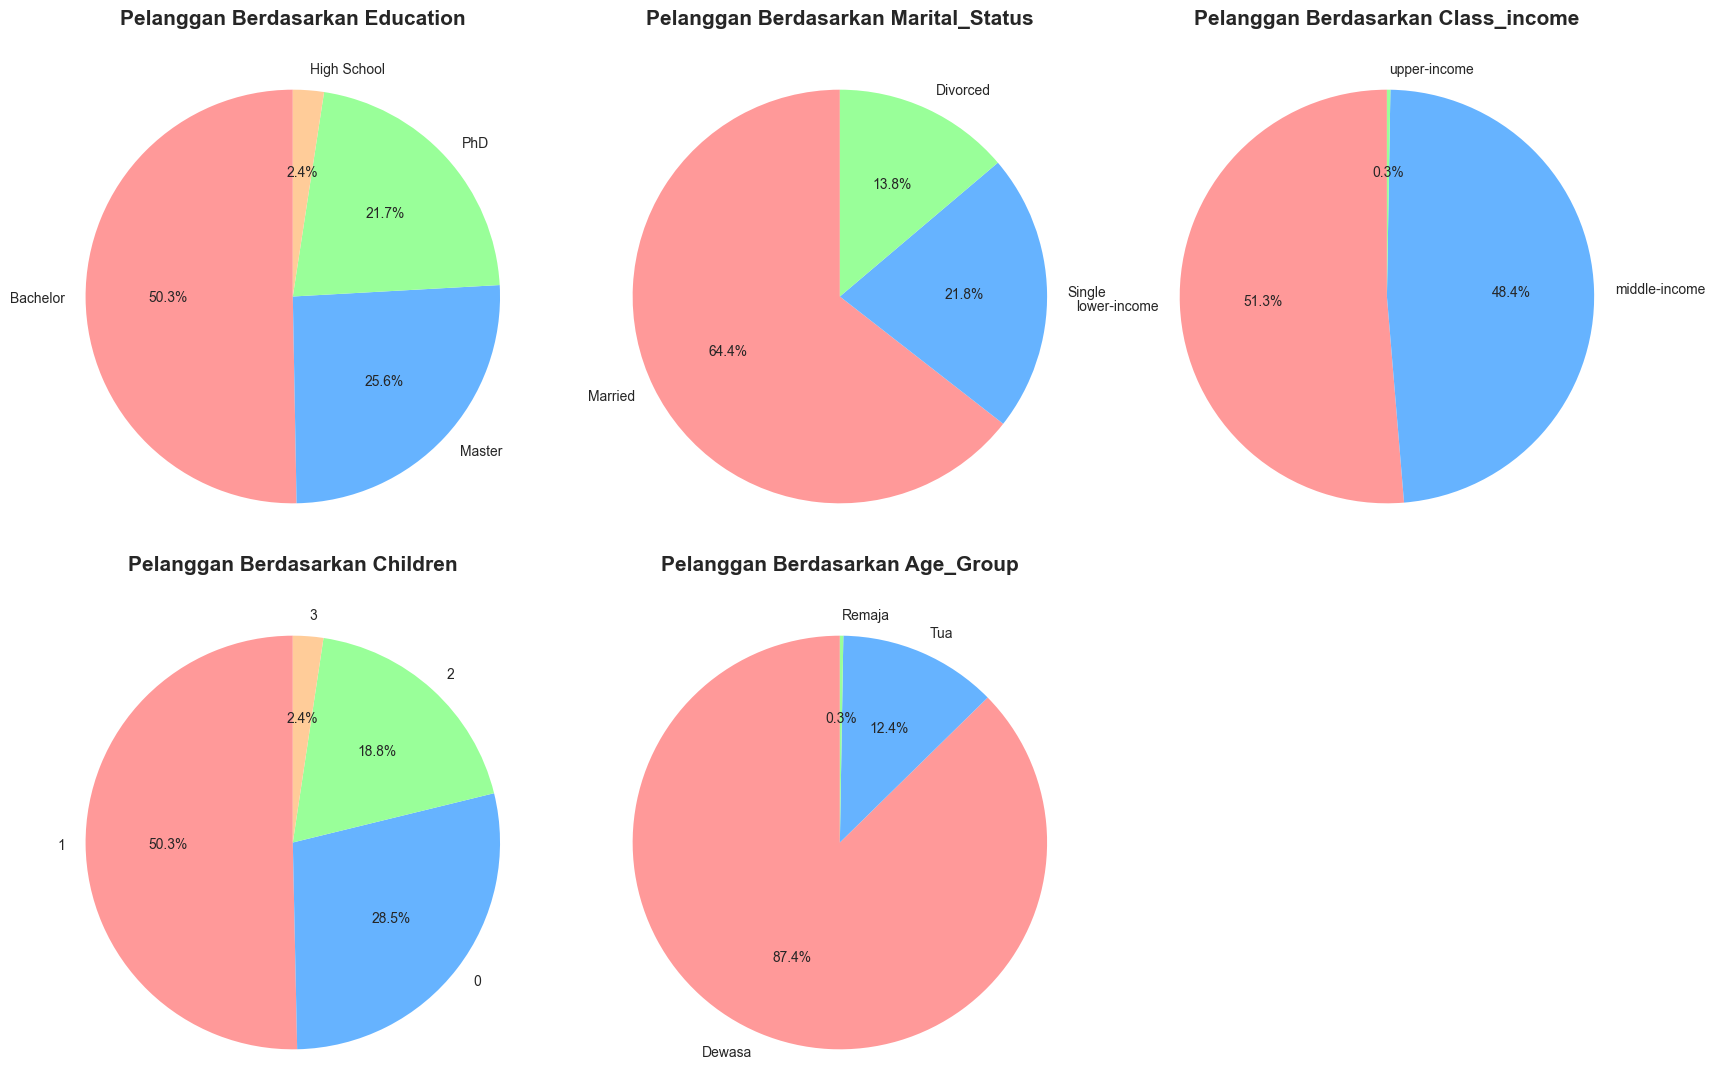

In [30]:
# Daftar kolom yang ingin dianalisis
columns_to_analyze = ['Education', 'Marital_Status', 'Class_income', 'Children', 'Age_Group']

# Daftar warna yang akan digunakan
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Mengatur ukuran gambar dan layout subplot
plt.figure(figsize=(20, 13))
plt.tight_layout()

# Loop melalui setiap kolom untuk membuat subplot
for i, column in enumerate(columns_to_analyze, start=1):
    counts = df[column].value_counts()
    labels = counts.index
    percentages = (counts / counts.sum()) * 100

    plt.subplot(2, 3, i)
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.axis('equal')
    plt.title(f'Pelanggan Berdasarkan {column}', size=15, fontweight='bold', y=1.08) 

plt.savefig('Distribusi Pelanggan.png')
plt.show()

Temuan:<br>
* **Pelanggan berdasarkan Education:** saat ini perusahaan memiliki customers terbesar dengan tingkat pendidikan `bachelor` dengan proporsi nilai sebesar 50.3%.
* **Pelanggan berdasarkan Marital Status:** saat ini perusahaan memiliki customers terbesar dengan status pernikahan `Married` dengan proporsi nilai sebesar 64.4%.
* **Pelanggan berdasarkan Income:** saat ini perusahaan memiliki customers terbesar dengan `lower-income` yaitu < $52000 per tahun dengan proporsi nilai sebesar 51.3%.
* **Pelanggan berdasarkan Jumlah Anak:** saat ini perusahaan memiliki customers terbesar dengan `jumlah anak 1` dengan proporsi nilai sebesar 50.3%.
* **Pelanggan berdasarkan Umur:** saat ini perusahaan memiliki customers terbesar pada kategori `Dewasa` dengan proporsi nilai sebesar 87.4%.

***


### b) Analisis Kampanye Promosi:

Pada tahap ini, saya akan menganalisis efektifitas setiap campaign (Campaign1 hingga Last_Campaign).
* Berapa banyak pelanggan yang menerima penawaran pada setiap kampanye?
* Kampanye yang paling banyak diterima oleh pelanggan akan menjadi acuan pada analisis selanjutnya, karena dianggap sebagai campanye terbaik saat ini.

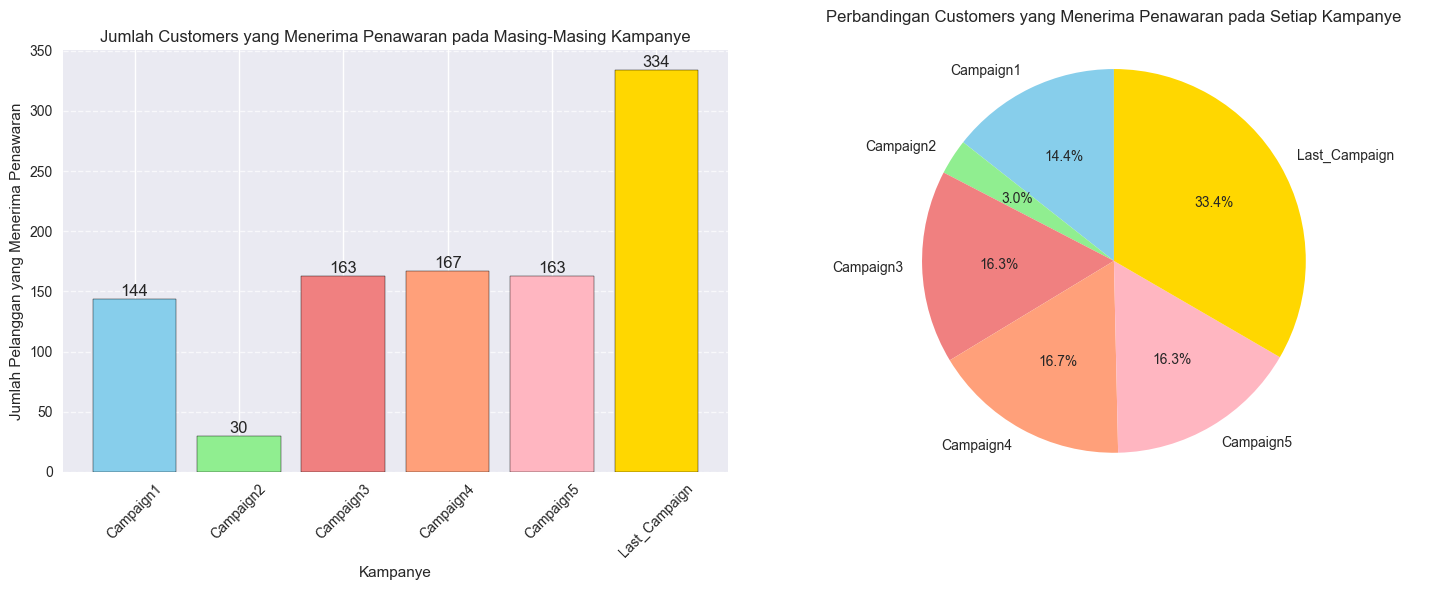

In [33]:
campaigns = ['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Last_Campaign']
campaign_counts = df[campaigns].sum()

# Data untuk pie chart
total_customers = campaign_counts.sum()
percentages = (campaign_counts / total_customers) * 100
labels = campaign_counts.index
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'gold']

# Membuat gambar besar dengan dua subplot (1 bar plot dan 1 pie chart)
plt.figure(figsize=(15, 6))

# Subplot untuk bar plot
plt.subplot(1, 2, 1)
plt.bar(campaign_counts.index, campaign_counts.values, color=colors, edgecolor='black')
plt.xlabel('Kampanye')
plt.ylabel('Jumlah Pelanggan yang Menerima Penawaran')
plt.title('Jumlah Customers yang Menerima Penawaran pada Masing-Masing Kampanye')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
for i, v in enumerate(campaign_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

# Subplot untuk pie chart
plt.subplot(1, 2, 2)
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Perbandingan Customers yang Menerima Penawaran pada Setiap Kampanye', pad=20)

plt.savefig('Kampanye Terbaik.png')
plt.tight_layout()
plt.show()

Dari seluruh campaign yang telah dilakukan oleh Supermarket:<br>
* Campaign terakhir yang dilakukan sudah jauh lebih baik dari campaign-campaign sebelumnya dimana pada campaign terakhir mampu menarik sebanyak 334 customers. Artinya campaign terakhir unggul 100 % dari campaign4 yang merupakan campaign terbaik kedua.
* Karena Last_Campaign merupakan campaign terbaik saat ini, untuk itu, analisis selanjutnya akan berfokus pada Last_Campaign.

***

## 2) Analisis Efektifitas Last_Campaign dalam Meningkatkan Penjualan `Wine`

* Sebaran pelanggan yang membeli `Wine` berdasarkan pelanggan yang `menerima` dan `tidak menerima` Last_Campaign

In [35]:
wine_buyers = df[df['Wines'] > 0]

campaign_distribution = wine_buyers['Last_Campaign'].value_counts()

pie_chart = px.pie(
    values=campaign_distribution.values,
    names=campaign_distribution.index,
    color_discrete_sequence=px.colors.qualitative.Pastel
)

pie_chart.update_layout(title_text='Persentase pelanggan yang Menerima dan tidak Menerima Last_Campaign pada Wine', title_x=0.5)
pie_chart.show()

Temuan:<br>
Dari seluruh pelanggan yang dimiliki oleh Supermarket, hanya 15% dari mereka yang menerima campaign terakhir pada produk `Wine`. Jumlah ini bahkan masih dibawah seperlima dari total pelanggan yang dimiliki. Sehingga muncul pertanyaan:

* Kenapa banyak dari pelanggan tidak menerima campaign?
* Apakah ada kesalahan dalam target pasar yang dituju?

Untuk menjawab pertanyaan tersebut, mari kita lanjutkan analisis lebih mendalam.

***

* Total Pembelian Wine pada pelanggan yang `menerima` dan `tidak menerima` Last_Campaign

In [84]:
campaign_received = df[df['Last_Campaign'] == 1]

campaign_not_received = df[df['Last_Campaign'] == 0]

total_pembelian_received = campaign_received['Wines'].sum()
total_pembelian_not_received = campaign_not_received['Wines'].sum()

data = pd.DataFrame({
    'Status Campaign': ['Menerima', 'Tidak Menerima'],
    'Total Pembelian Wines': [total_pembelian_received, total_pembelian_not_received]
})

pie_chart = px.pie(
    data,
    values='Total Pembelian Wines',
    names='Status Campaign',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

pie_chart.update_layout(title_text='Persentase pembelian Wine pada pelanggan yang menerima/menolak Last Campaign', title_x=0.5)

pie_chart.show()

Temuan:<br>
Dari seluruh penjualan Wine, Last_Campaign hanya mampu menyumbang penjualan sebesar 24.7%, hal ini dikarenakan dari 2226 pelanggan yang ada, hanya 334 pelanggan saja yang menerima Last_Campaign. Hal ini menjadi PR bagi perusahaan, bagaimana campaign selanjutnya bisa menjangkau lebih banyak pelanggan sehingga akan meningkatkan penjualan wine secara signifikan.
***

### A) Pelanggan yang menerima/tidak menerima Last_Campaign pada `Wine` berdasarkan Education

* Berapa jumlah pelanggan yang menerima/tidak menerima Last_Campaign pada produk `Wine`?

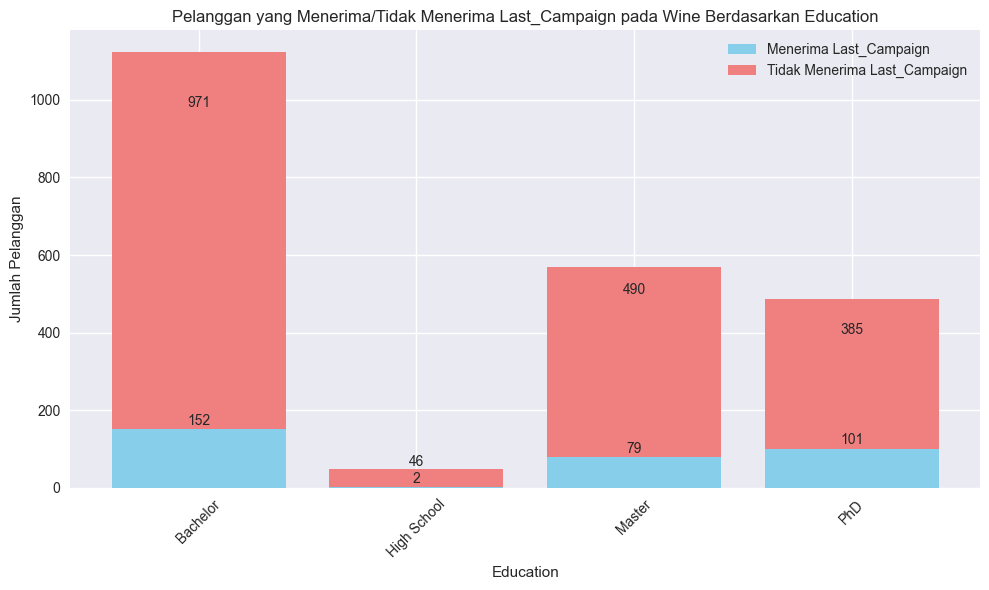

In [36]:
df_wines = df[df['Wines'] > 0]

campaign_by_education = df_wines.groupby(['Education', 'Last_Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_education.index, campaign_by_education[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_education.index, campaign_by_education[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_by_education[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Education')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Pelanggan yang Menerima/Tidak Menerima Last_Campaign pada Wine Berdasarkan Education')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Jumlah wine vs education accept campaign.png')
plt.show()

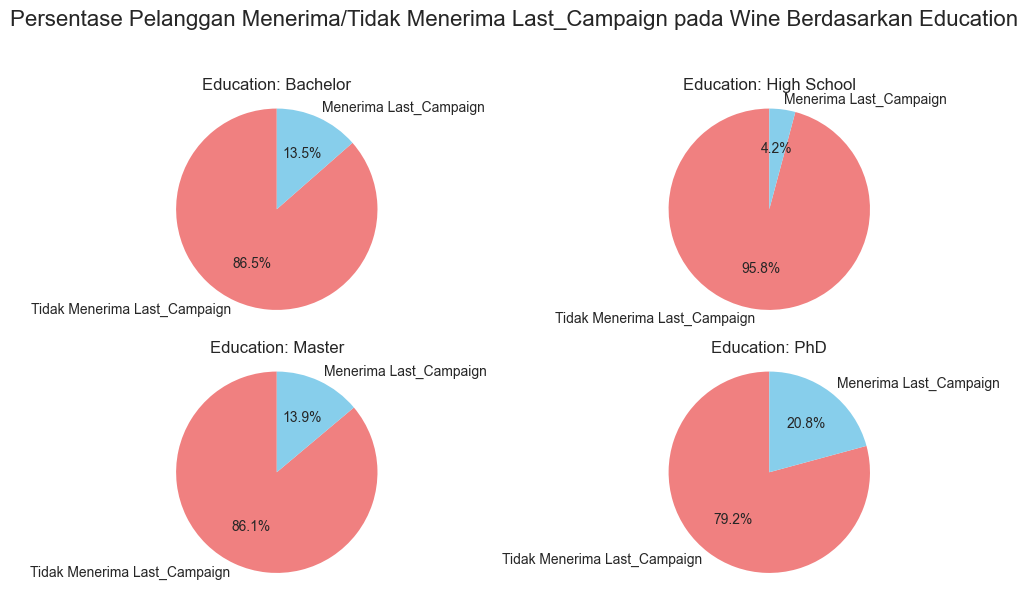

In [37]:
df_wines = df[df['Wines'] > 0]
campaign_by_education = df_wines.groupby(['Education', 'Last_Campaign']).size().unstack(fill_value=0)
educations = campaign_by_education.index
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign pada Wine Berdasarkan Education', fontsize=16)
for i, education in enumerate(educations):
    row = i // 2
    col = i % 2
    data = campaign_by_education.loc[education]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']
    
    axs[row, col].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[row, col].set_title(f'Education: {education}')
    axs[row, col].axis('equal') 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('persentase wine vs education accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan paling banyak didominasi oleh kalangan `Bachelor` yaitu berjumlah 1123 pelanggan. Namun dari seluruh pelanggan yang ada, hanya 152 orang atau 13.5% saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Jika kita bandingkan dengan kalangan PhD yang hanya berjumlah 486 pelanggan, ada 101 orang atau 20.8% yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Sehingga kita perlu melakukan analisa lebih dalam kenapa pada kalangan bachelor yang jumlah pasarnya sangat banyak, justu campaign yang dilakukan tidak efektif dibandingkan pada kalangan education lainnya khususnya PhD.

Secara keseluruhan, kalangan bachelor adalah kalangan yang paling mendominasi diantara kalangan lainnya, artinya minat mereka terhadap produk Wine sangat tinggi. Namun yang menjadi masalah adalah penerimaan mereka terhadap last campaign yang dilakukan cenderung rendah. Saya telah mencoba menghubungkan antara Education dan Income, hasilnya menunjukkan kalangan bachelor mendominasi pada lower-income dan middle-income yang juga merupakan kalangan yang banyak menerima last campaign berdasarkan income. Menurut [https://dailysocial.id/](https://dailysocial.id/post/apa-itu-marketing-campaign-dan-cara-membuatnya#:~:text=Langkah-langkah%20yang%20Dilakukan%20dalam%20Marketing%20Campaign%201%201.,6.%20Melakukan%20Pemantauan%20dan%20Evaluasi%20Secara%20Optimal%20) hal-hal yang perlu diperhatikan dalam melakukan kampanye promosi adalah Menentukan Tujuan, Budget dan Target Pasar, Mempelajari Kompetitor, Memilih Channel yang Sesuai dengan Target dan Tujuan, dan Memanfaatkan Pemasaran Digital.
Dari penjelasan tersebut, saya berasumsi last campaign yang dilakukan target pasarnya tidak sesuai atau pemanfaatan sosial media yang masih kurang sehingga kampanye yang dilakukan tidak kreatif sehingga kurang menyasar pada kalangan bachelor.
***

* Berapa jumlah pembelian `Wine` pada pelanggan yang menerima/tidak menerima Last_Campaign?

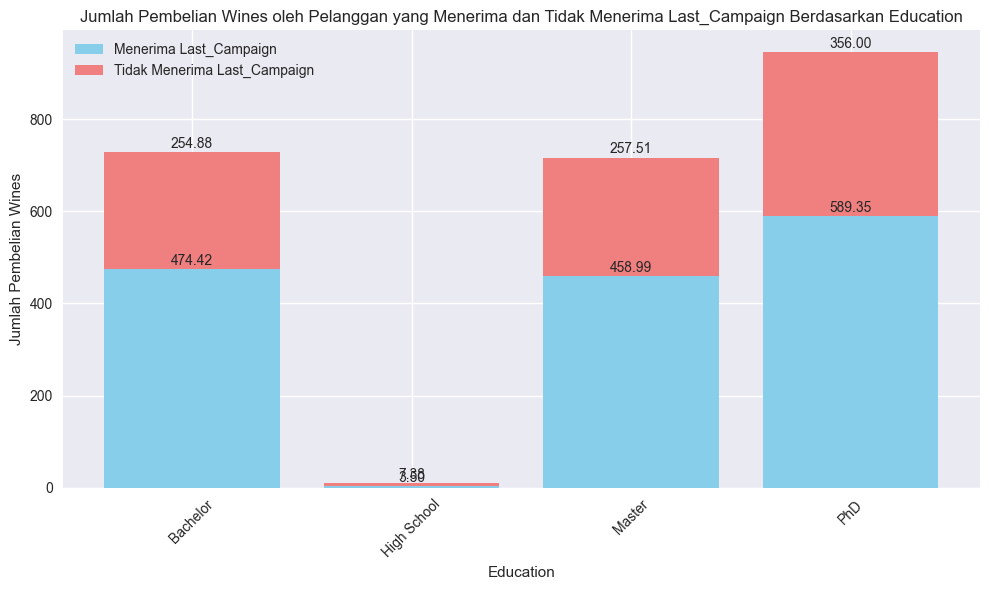

In [38]:
campaign_wines_by_education = df.groupby(['Education', 'Last_Campaign']).agg({'Wines': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_wines_by_education.index, campaign_wines_by_education[('Wines', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_wines_by_education.index, campaign_wines_by_education[('Wines', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_wines_by_education[('Wines', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Education')
ax.set_ylabel('Jumlah Pembelian Wines')
ax.set_title('Jumlah Pembelian Wines oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Education')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rata-rata wine vs education accept campaign.png')
plt.show()

Temuan:<tb>

Berdasarkan barplot diatas, ternyata pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika Supermarket bisa menargetkan campaign selanjutnya pada kalangan Bachelor karena kalangan bachelor memiliki pangsa pasar paling besar namun salah satu yang terendah dalam penerimaan campaign.

### B) Pelanggan yang menerima/tidak menerima Last_Campaign pada `Wine` berdasarkan Marital Status

* Berapa jumlah pelanggan yang menerima/tidak menerima Last_Campaign pada produk `Wine`?

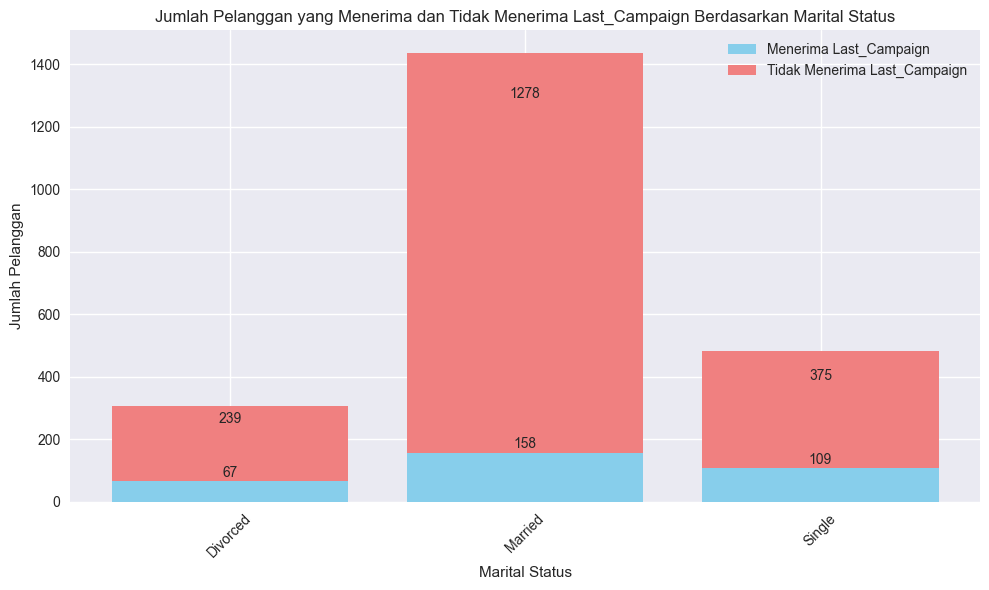

In [39]:
df_wines = df[df['Wines'] > 0]

campaign_by_marital = df_wines.groupby(['Marital_Status', 'Last_Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_marital.index, campaign_by_marital[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_marital.index, campaign_by_marital[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_by_marital[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Marital Status')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('jumlah wine vs marital accept campaign.png')
plt.show()

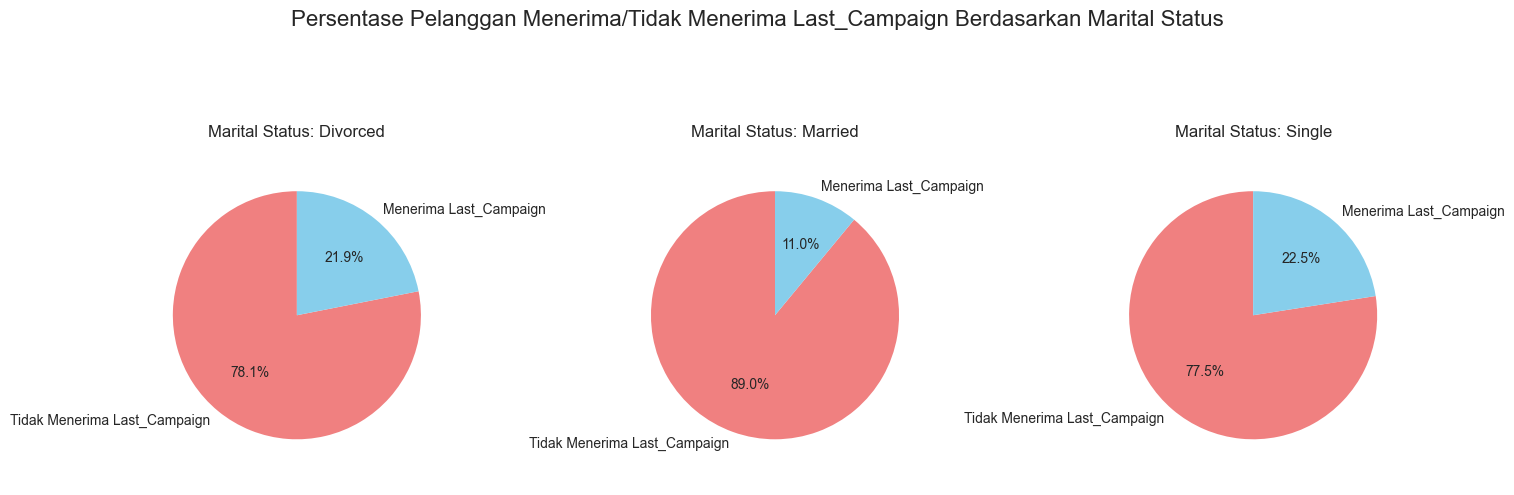

In [40]:
df_wines = df[df['Wines'] > 0]
campaign_by_marital = df_wines.groupby(['Marital_Status', 'Last_Campaign']).size().unstack(fill_value=0)
maritals = campaign_by_marital.index

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign Berdasarkan Marital Status', fontsize=16)

for i, marital in enumerate(maritals):
    data = campaign_by_marital.loc[marital]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']

    axs[i].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Marital Status: {marital}')
    axs[i].axis('equal')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig('persentase wine vs marital accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan paling banyak didominasi oleh kalangan `Married` yaitu berjumlah 1436 pelanggan. Namun dari seluruh pelanggan yang ada, hanya 158 orang atau 11% saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Jika kita bandingkan dengan kalangan `Single` yang hanya berjumlah 484 pelanggan, ada 109 orang atau 22.5% yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Sehingga kita perlu melakukan analisa lebih dalam kenapa pada kalangan `Married` yang jumlah pasarnya sangat banyak, justu campaign yang dilakukan tidak begitu efektif dibandingkan pada kalangan marital status lainnya khususnya pelanggan yang single.

Secara keseluruhan, pasangan yang married adalah kalangan yang paling mendominasi diantara kalangan lainnya, artinya minat mereka terhadap produk Wine sangat tinggi. Namun yang menjadi masalah adalah penerimaan mereka terhadap last campaign yang dilakukan cenderung rendah. Sama seperti sebelumnya, saya akan mengutip [https://dailysocial.id/](https://dailysocial.id/post/apa-itu-marketing-campaign-dan-cara-membuatnya#:~:text=Langkah-langkah%20yang%20Dilakukan%20dalam%20Marketing%20Campaign%201%201.,6.%20Melakukan%20Pemantauan%20dan%20Evaluasi%20Secara%20Optimal%20) lagi, hal-hal yang mungkin menjadi penyebab rendahnya penerimaan last campaign adalah karena target pasar yang ingin disasar tidak jelas, dan juga strategi campaign yang dilakukan kurang kreatif.


***

* Berapa jumlah pembelian `Wine` pada pelanggan yang menerima/tidak menerima Last_Campaign?

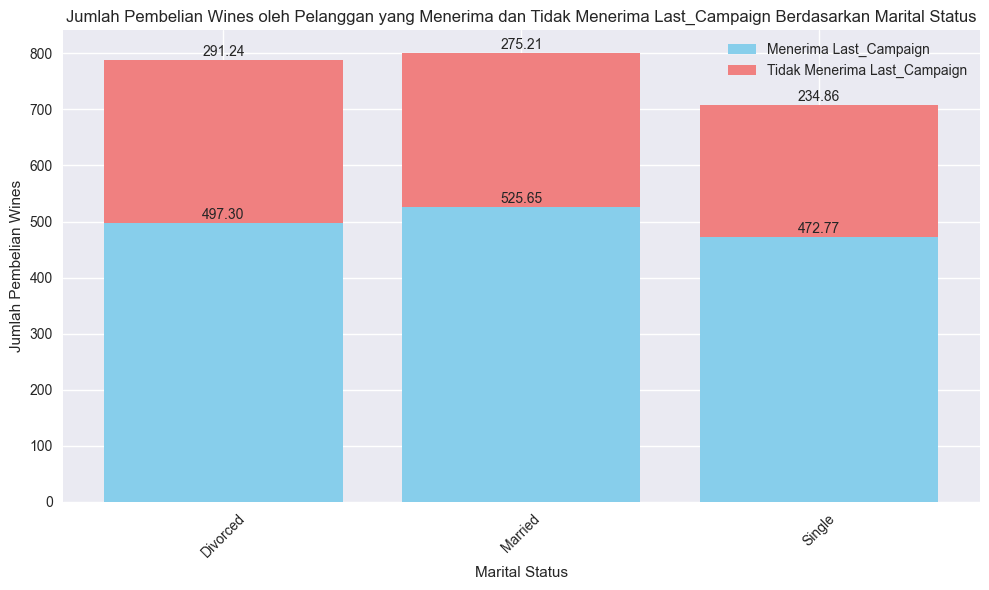

In [41]:
campaign_wines_by_marital = df.groupby(['Marital_Status', 'Last_Campaign']).agg({'Wines': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_wines_by_marital.index, campaign_wines_by_marital[('Wines', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_wines_by_marital.index, campaign_wines_by_marital[('Wines', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_wines_by_marital[('Wines', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Marital Status')
ax.set_ylabel('Jumlah Pembelian Wines')
ax.set_title('Jumlah Pembelian Wines oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Marital Status')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rata-rata wine vs marital accept campaign.png')
plt.show()

Temuan:<tb>

Berdasarkan barplot diatas, ternyata pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika Supermarket bisa menargetkan campaign selanjutnya pada `pelanggan yang sudah menikah`, karena pelanggan yang menikah memiliki pangsa pasar paling besar namun yang terendah dalam penerimaan campaign.

### C) Pelanggan yang menerima/tidak menerima Last_Campaign pada `Wine` berdasarkan Income

* Berapa jumlah pelanggan yang menerima/tidak menerima Last_Campaign pada produk `Wine`?

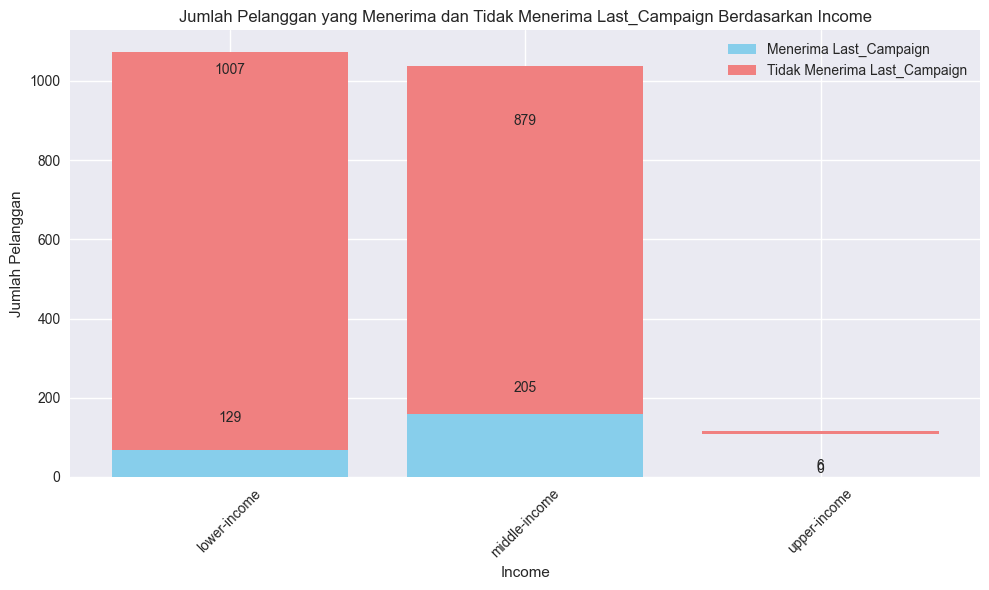

In [42]:
df_wines = df[df['Wines'] > 0]

campaign_by_income = df_wines.groupby(['Class_income', 'Last_Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_income.index, campaign_by_income[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_income.index, campaign_by_income[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_by_marital[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Income')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Income')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('jumlah wine vs income accept campaign.png')
plt.show()

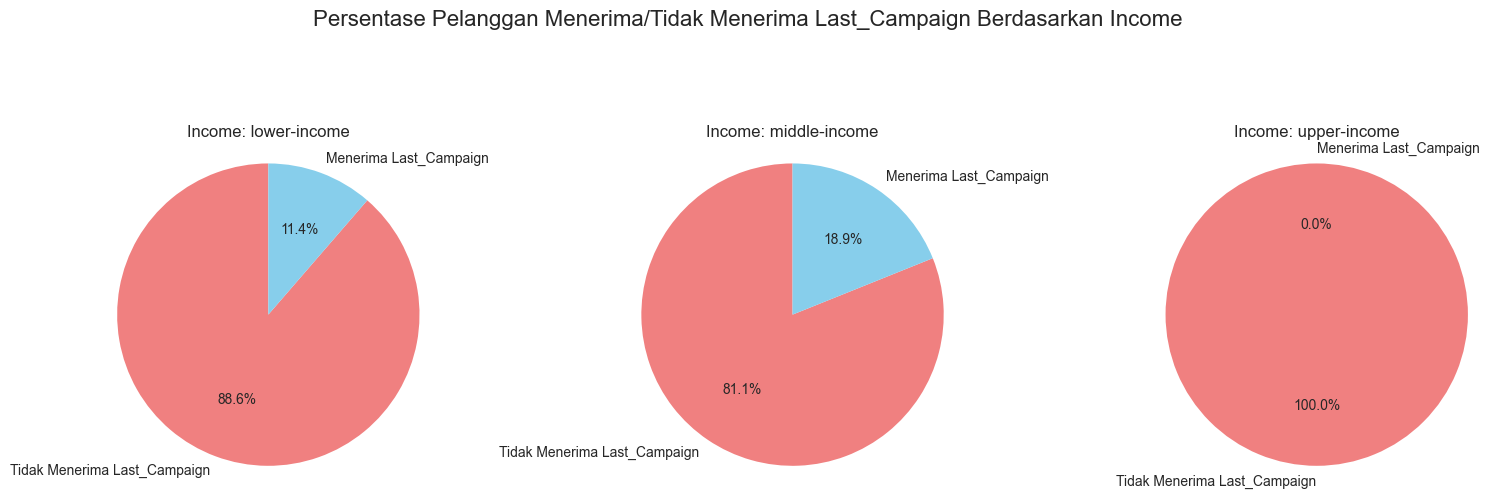

In [43]:
df_wines = df[df['Wines'] > 0]
campaign_by_income = df_wines.groupby(['Class_income', 'Last_Campaign']).size().unstack(fill_value=0)
incomes = campaign_by_income.index

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign Berdasarkan Income', fontsize=16)

for i, income in enumerate(incomes):
    data = campaign_by_income.loc[income]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']

    axs[i].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Income: {income}')
    axs[i].axis('equal')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig('persentase wine vs income accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan paling banyak didominasi oleh kalangan yang memiliki `lower-income` yaitu berjumlah 1136 pelanggan. Namun dari seluruh pelanggan yang ada, hanya 129 orang atau 11.4% saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Jika kita bandingkan dengan kalangan yang memiliki `middle-income` yang hanya berjumlah 1084 pelanggan, ada 205 orang atau 18.9% yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Sehingga kita perlu melakukan analisa lebih dalam kenapa pada kalangan yang memiliki `lower-income` yang jumlah pasarnya sangat banyak, justu campaign yang dilakukan tidak begitu efektif dibandingkan pada kalangan kelas income yang memiliki income `middle-income`.

Secara keseluruhan, lower-income adalah kalangan yang paling mendominasi diantara kalangan lainnya, artinya minat mereka terhadap produk Wine sangat tinggi. Namun yang menjadi masalah adalah penerimaan mereka terhadap last campaign yang dilakukan cenderung rendah, bahkan jumlah pelanggan yang menerima last campaign lebih rendah dari pelanggan yang memiliki middle-income. Lagi-lagi saya akan berpedoman pada [https://dailysocial.id/](https://dailysocial.id/post/apa-itu-marketing-campaign-dan-cara-membuatnya#:~:text=Langkah-langkah%20yang%20Dilakukan%20dalam%20Marketing%20Campaign%201%201.,6.%20Melakukan%20Pemantauan%20dan%20Evaluasi%20Secara%20Optimal%20) dimana hal-hal yang mungkin menjadi penyebab rendahnya penerimaan last campaign pada pelanggan yang memiliki lower-income adalah karena target pasar yang ingin disasar tidak jelas, strategi campaign yang dilakukan kurang kreatif atau harga yang ditawarkan kurang kompetitif.

***

* Berapa jumlah pembelian `Wine` pada pelanggan yang menerima/tidak menerima Last_Campaign?

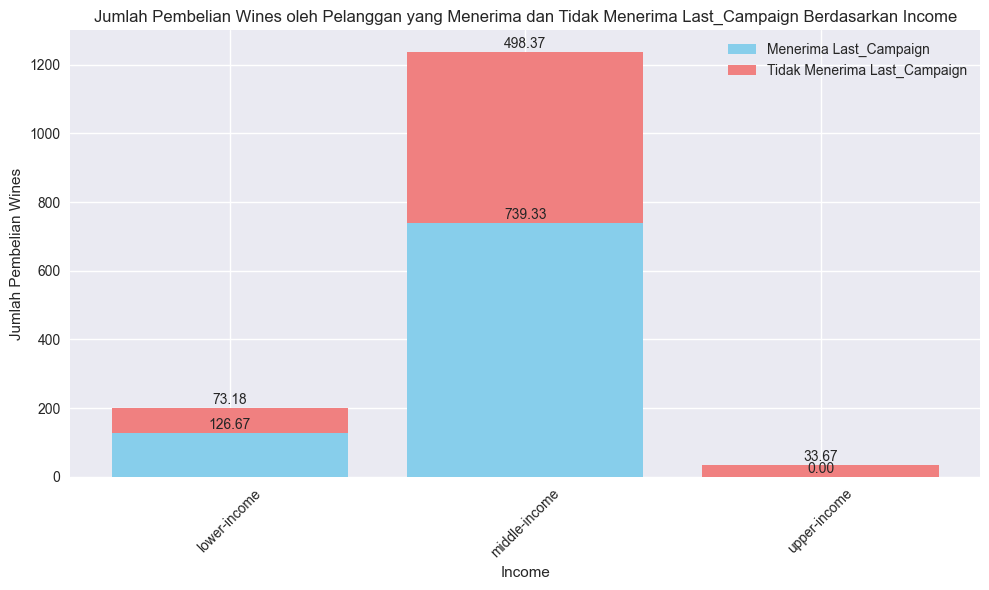

In [44]:
campaign_wines_by_income = df.groupby(['Class_income', 'Last_Campaign']).agg({'Wines': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_wines_by_income.index, campaign_wines_by_income[('Wines', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_wines_by_income.index, campaign_wines_by_income[('Wines', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_wines_by_income[('Wines', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Income')
ax.set_ylabel('Jumlah Pembelian Wines')
ax.set_title('Jumlah Pembelian Wines oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Income')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rata-rata wine vs income accept campaign.png')
plt.show()

Temuan:<tb>

Berdasarkan barplot diatas, dapat dilihat bahwa pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika Supermarket bisa menargetkan campaign selanjutnya pada pelanggan yang memiliki `lower-income`, karena pelanggan yang memiliki lower-income memiliki pangsa pasar paling besar namun yang terendah dalam penerimaan campaign, supermarket juga bisa menargetkan campaign selanjutnya pada kalangan yang memiliki upper-income dengan tujuan untuk mendapatkan pelanggan baru karena jumlah pelanggan dengan upper-income sangat kecil proporsinya.

### D) Pelanggan yang menerima/tidak menerima Last_Campaign pada `Wine` berdasarkan Jumlah Anak

* Berapa jumlah pelanggan yang menerima/tidak menerima Last_Campaign pada produk `Wine`?

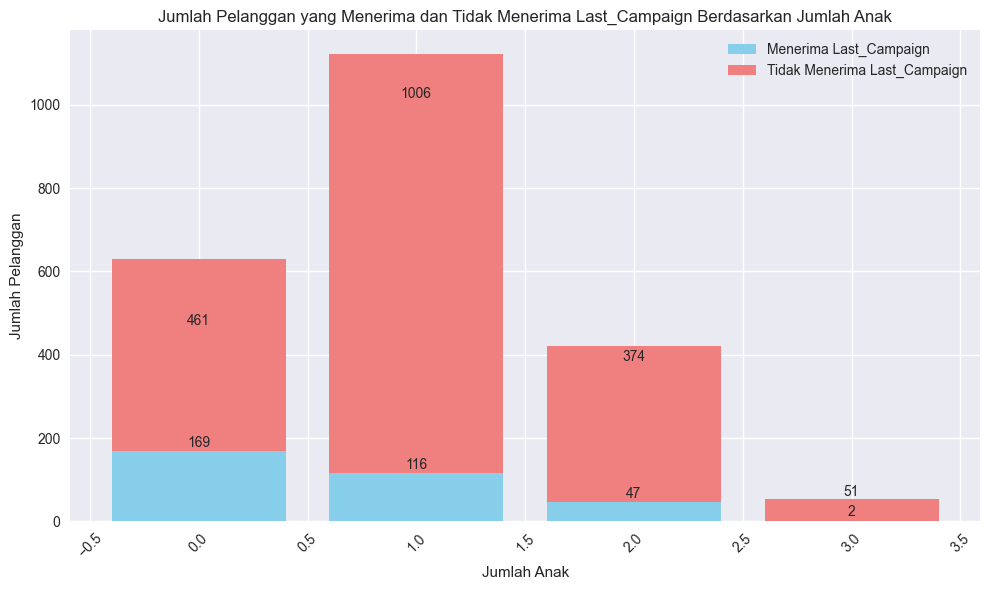

In [45]:
df_wines = df[df['Wines'] > 0]

campaign_by_child = df_wines.groupby(['Children', 'Last_Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_child.index, campaign_by_child[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_child.index, campaign_by_child[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_by_child[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Jumlah Anak')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Jumlah Anak')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('jumlah wine vs child accept campaign.png')
plt.show()

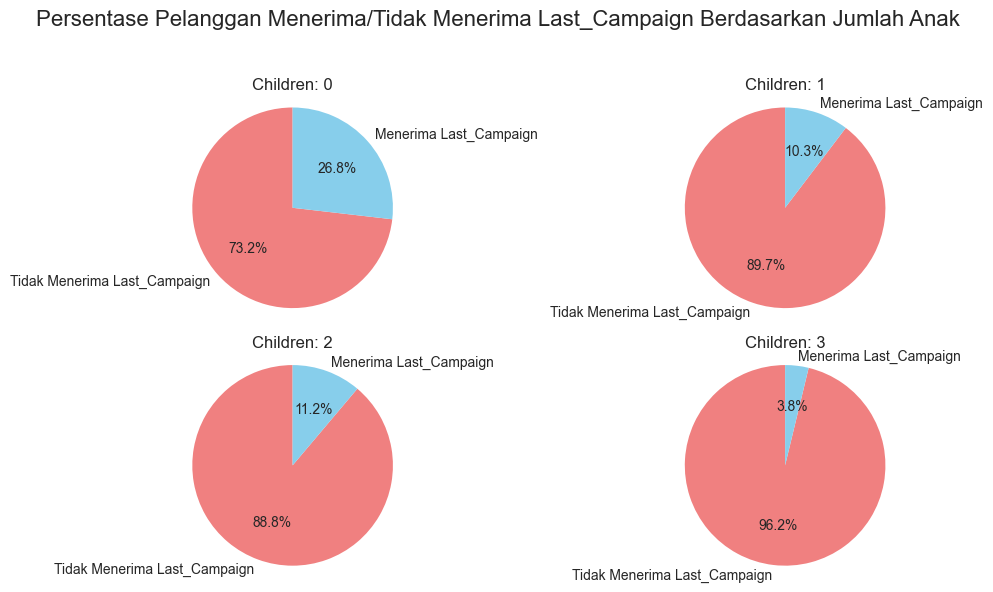

In [46]:
df_wines = df[df['Wines'] > 0]
campaign_by_child = df_wines.groupby(['Children', 'Last_Campaign']).size().unstack(fill_value=0)
children = campaign_by_child.index
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign Berdasarkan Jumlah Anak', fontsize=16)
for i, child in enumerate(children):
    row = i // 2
    col = i % 2
    data = campaign_by_child.loc[child]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']
    
    axs[row, col].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[row, col].set_title(f'Children: {child}')
    axs[row, col].axis('equal') 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('persentase wine vs child accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan paling banyak didominasi oleh kalangan yang memiliki `1 anak`, yaitu berjumlah `1122 pelanggan`. Namun dari seluruh pelanggan yang ada, hanya `116 orang` atau `10.3%` saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Jika kita bandingkan dengan kalangan yang `tidak memiliki anak` yang hanya berjumlah `630 pelanggan`, ada `169 orang` atau `26.8 %` yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Sehingga kita perlu melakukan analisa lebih dalam kenapa pada kalangan yang memiliki `1 anak` yang jumlah pasarnya sangat banyak, justu campaign yang dilakukan tidak begitu efektif dibandingkan pada kalangan yang `tidak memiliki anak`.

Secara keseluruhan, pelanggan yang memiliki 1 anak adalah kalangan yang paling mendominasi diantara kalangan lainnya, artinya minat mereka terhadap produk Wine sangat tinggi. Namun yang menjadi masalah adalah penerimaan mereka terhadap last campaign yang dilakukan cenderung rendah, bahkan jumlah pelanggan yang menerima last campaign lebih rendah dari pelanggan yang tidak memiliki anak, dimana secara distribusi jumlah pelanggannya lebih sedikit. Saya juga akan mengutip [https://dailysocial.id/](https://dailysocial.id/post/apa-itu-marketing-campaign-dan-cara-membuatnya#:~:text=Langkah-langkah%20yang%20Dilakukan%20dalam%20Marketing%20Campaign%201%201.,6.%20Melakukan%20Pemantauan%20dan%20Evaluasi%20Secara%20Optimal%20) dimana hal-hal yang perlu diperhatikan dalam melakukan kampanye promosi adalah Menentukan Tujuan, Budget dan Target Pasar, Mempelajari Kompetitor, Memilih Channel yang Sesuai dengan Target dan Tujuan, dan Memanfaatkan Pemasaran Digital. Saya berasumsi last campaign yang dilakukan tidak spesifik menyasar pelanggan yang memiliki 1 anak, strategi campaign yang dilakukan kurang kreatif atau harga yang ditawarkan kurang kompetitif.

***

* Berapa jumlah pembelian `Wine` pada pelanggan yang menerima/tidak menerima Last_Campaign?

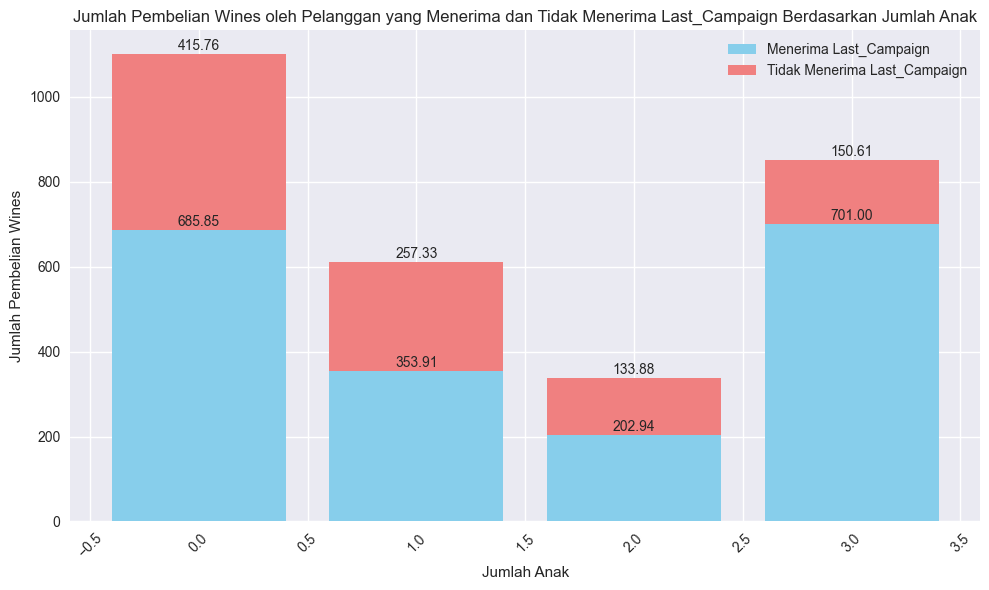

In [47]:
campaign_wines_by_child = df.groupby(['Children', 'Last_Campaign']).agg({'Wines': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_wines_by_child.index, campaign_wines_by_child[('Wines', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_wines_by_child.index, campaign_wines_by_child[('Wines', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_wines_by_child[('Wines', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Jumlah Anak')
ax.set_ylabel('Jumlah Pembelian Wines')
ax.set_title('Jumlah Pembelian Wines oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Jumlah Anak')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rata-rata wine vs child accept campaign.png')
plt.show()

Temuan:<tb>

Berdasarkan barplot diatas, dapat dilihat bahwa pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika Supermarket bisa menargetkan campaign selanjutnya pada pelanggan yang memiliki `1 anak`, karena pelanggan yang memiliki 1 anak memiliki pangsa pasar paling besar namun salah satu yang terendah dalam penerimaan campaign.

### E) Pelanggan yang menerima/tidak menerima Last_Campaign pada `Wine` berdasarkan Kelompok Usia

* Berapa jumlah pelanggan yang menerima/tidak menerima Last_Campaign pada produk `Wine`?

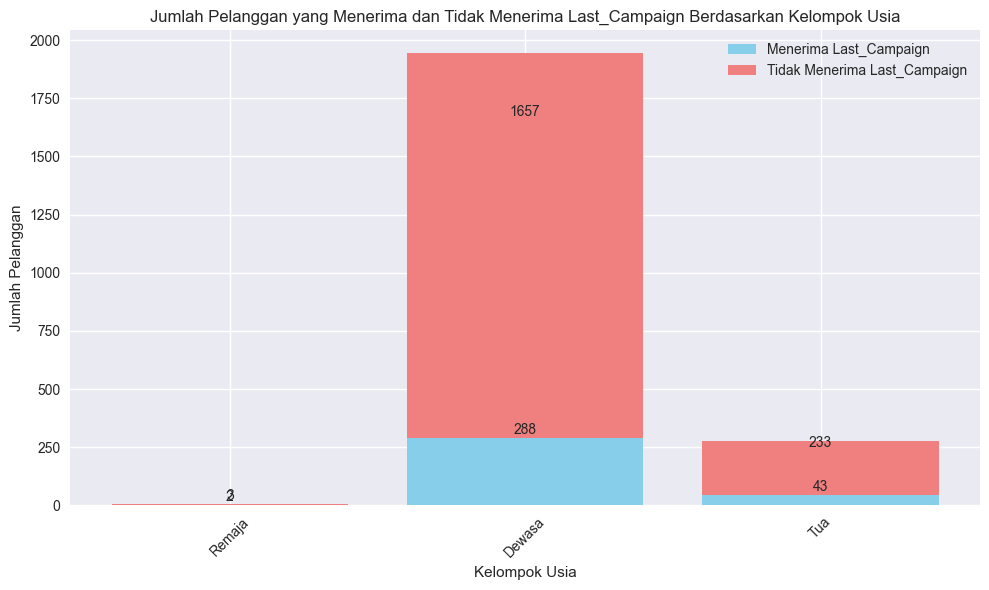

In [48]:
df_wines = df[df['Wines'] > 0]

campaign_by_age = df_wines.groupby(['Age_Group', 'Last_Campaign']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_by_age.index, campaign_by_age[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_by_age.index, campaign_by_age[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_by_age[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('Jumlah Pelanggan')
ax.set_title('Jumlah Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Kelompok Usia')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('jumlah wine vs usia accept campaign.png')
plt.show()

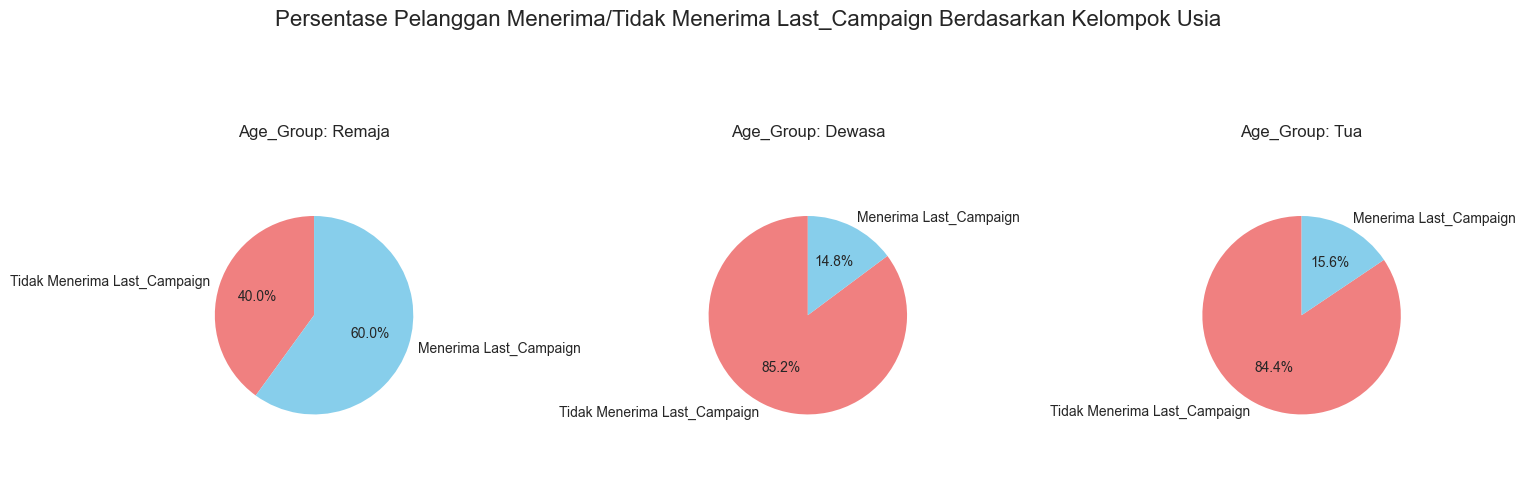

In [49]:
df_wines = df[df['Wines'] > 0]
campaign_by_age = df_wines.groupby(['Age_Group', 'Last_Campaign']).size().unstack(fill_value=0)
ages = campaign_by_age.index

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Persentase Pelanggan Menerima/Tidak Menerima Last_Campaign Berdasarkan Kelompok Usia', fontsize=16)

for i, age in enumerate(ages):
    data = campaign_by_age.loc[age]
    labels = ['Tidak Menerima Last_Campaign', 'Menerima Last_Campaign']
    colors = ['lightcoral', 'skyblue']

    axs[i].pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Age_Group: {age}')
    axs[i].axis('equal')

plt.tight_layout(rect=[0, 0, 1, 0.85])
plt.savefig('rata-rata wine vs usia accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan paling banyak didominasi oleh kalangan `Dewasa`, yaitu berjumlah `1945 pelanggan`. Namun dari seluruh pelanggan yang ada, hanya `288 orang` atau `14.8%` saja yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Jika kita bandingkan dengan kalangan `Tua` yang hanya berjumlah `276 pelanggan`, ada `43 orang` atau `15.6 %` yang menerima Last_Campaign dan melakukan pembelian pada produk `Wine`.
* Sehingga kita perlu melakukan analisa lebih dalam kenapa pada kalangan `Dewasa` yang jumlah pasarnya sangat banyak, justu campaign yang dilakukan tidak begitu efektif dibandingkan pada kalangan yang `Tua`.

Secara keseluruhan, pelanggan `dewasa` adalah kalangan yang paling mendominasi diantara kalangan lainnya, artinya minat mereka terhadap produk Wine sangat tinggi. Namun yang menjadi masalah adalah penerimaan mereka terhadap last campaign yang dilakukan cenderung rendah. Mengutip dari [https://dailysocial.id/](https://dailysocial.id/post/apa-itu-marketing-campaign-dan-cara-membuatnya#:~:text=Langkah-langkah%20yang%20Dilakukan%20dalam%20Marketing%20Campaign%201%201.,6.%20Melakukan%20Pemantauan%20dan%20Evaluasi%20Secara%20Optimal%20) dimana hal-hal yang perlu diperhatikan dalam melakukan kampanye promosi adalah Menentukan Tujuan, Budget dan Target Pasar, Mempelajari Kompetitor, Memilih Channel yang Sesuai dengan Target dan Tujuan, dan Memanfaatkan Pemasaran Digital. Saya berasumsi last campaign yang dilakukan kurang menyasar pelanggan dewasa, strategi campaign yang dilakukan kurang kreatif atau harga yang ditawarkan kurang kompetitif.

***

* Berapa jumlah pembelian `Wine` pada pelanggan yang menerima/tidak menerima Last_Campaign?

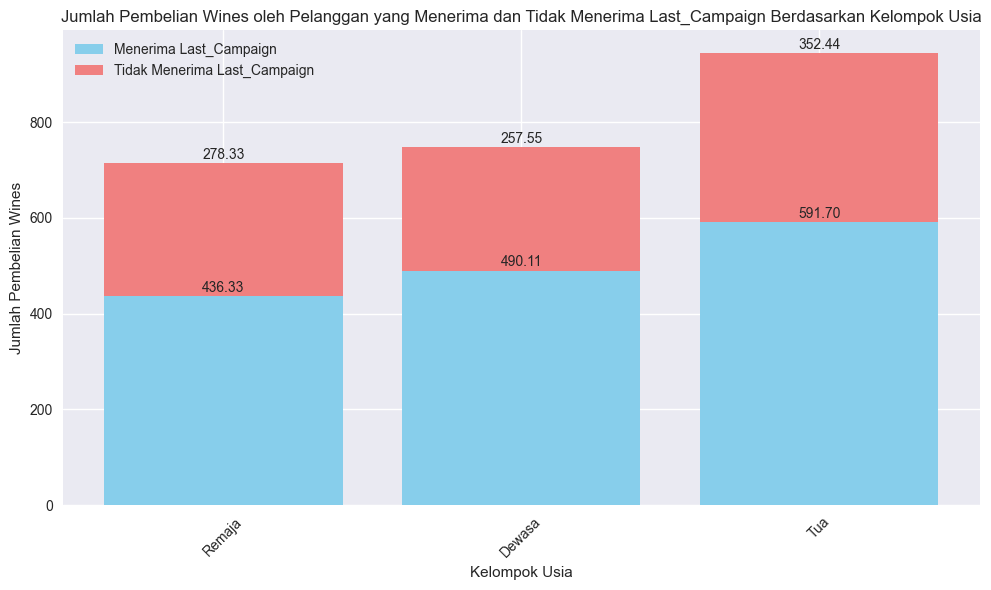

In [50]:
campaign_wines_by_age = df.groupby(['Age_Group', 'Last_Campaign']).agg({'Wines': 'mean'}).unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(campaign_wines_by_age.index, campaign_wines_by_age[('Wines', 1)], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_wines_by_age.index, campaign_wines_by_age[('Wines', 0)], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_wines_by_age[('Wines', 1)])

for bar, bar2 in zip(bar1, bar2):
    height1 = bar.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height1), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)
    ax.annotate(f'{height2:.2f}', xy=(bar2.get_x() + bar2.get_width() / 2, height1 + height2), xytext=(0, 3), 
                textcoords="offset points", ha='center', fontsize=10)

ax.set_xlabel('Kelompok Usia')
ax.set_ylabel('Jumlah Pembelian Wines')
ax.set_title('Jumlah Pembelian Wines oleh Pelanggan yang Menerima dan Tidak Menerima Last_Campaign Berdasarkan Kelompok Usia')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('persentase wine vs usia accept campaign.png')
plt.show()

Temuan:<tb>

Berdasarkan barplot diatas, dapat dilihat bahwa pelanggan yang menerima campaign melakukan rata-rata pembelian lebih banyak dibanding pelanggan yang tidak menerima campaign. Artinya ada potensi yang sangat besar jika Supermarket bisa menargetkan campaign selanjutnya pada pelanggan `dewasa`, karena pelanggan yang dewasa memiliki pangsa pasar paling besar namun yang terendah dalam penerimaan campaign.

## 3) Analisis Penjualan Wine pada Saluran Distribusi Berdasarkan Pelanggan yang Menerima/Tidak Menerima Last Campaign

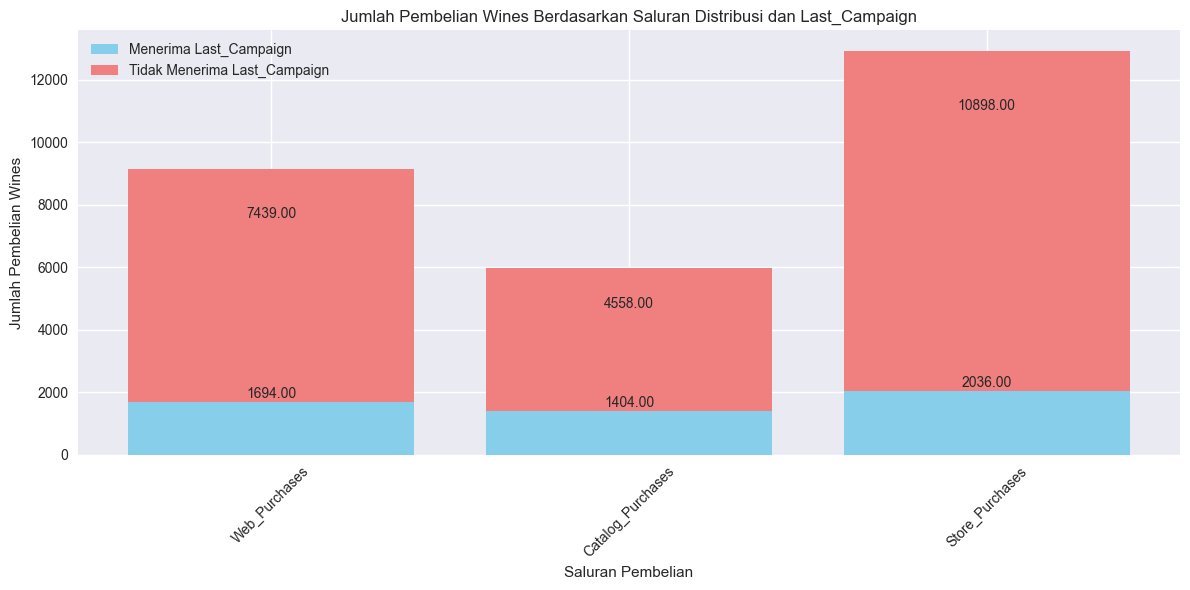

In [51]:
df_wines = df[df['Wines'] > 0]
purchase_channels = ['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']
campaign_wines_by_channel = df_wines.groupby(['Last_Campaign'])[purchase_channels].sum().T
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(campaign_wines_by_channel.index, campaign_wines_by_channel[1], label='Menerima Last_Campaign', color='skyblue')
bar2 = ax.bar(campaign_wines_by_channel.index, campaign_wines_by_channel[0], label='Tidak Menerima Last_Campaign', color='lightcoral', bottom=campaign_wines_by_channel[1])
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                    textcoords="offset points", ha='center', fontsize=10)
ax.set_xlabel('Saluran Pembelian')
ax.set_ylabel('Jumlah Pembelian Wines')
ax.set_title('Jumlah Pembelian Wines Berdasarkan Saluran Distribusi dan Last_Campaign')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('jumlah wine vs saluran accept campaign.png')
plt.show()


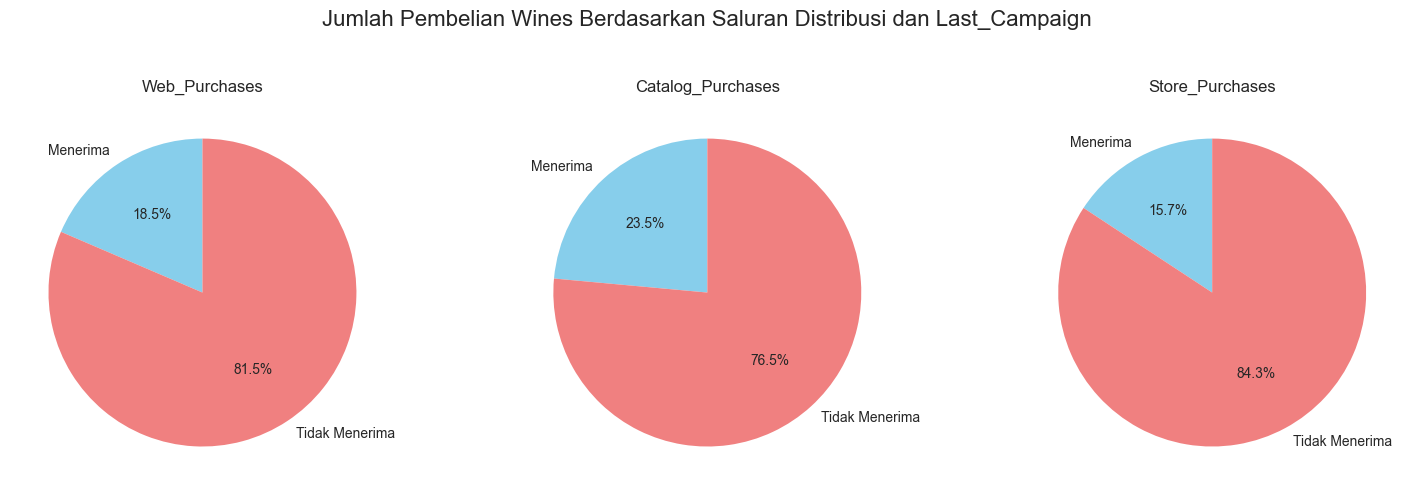

In [52]:
df_wines = df[df['Wines'] > 0]
purchase_channels = ['Web_Purchases', 'Catalog_Purchases', 'Store_Purchases']
campaign_wines_by_channel = df_wines.groupby(['Last_Campaign'])[purchase_channels].sum().T
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, channel in enumerate(purchase_channels):
    campaign1_data = campaign_wines_by_channel.loc[channel, 1]
    campaign0_data = campaign_wines_by_channel.loc[channel, 0]
    labels = ['Menerima', 'Tidak Menerima']
    sizes = [campaign1_data, campaign0_data]
    colors = ['skyblue', 'lightcoral']
    axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(channel)
plt.suptitle('Jumlah Pembelian Wines Berdasarkan Saluran Distribusi dan Last_Campaign', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.savefig('persentase wine vs saluran accept campaign.png')
plt.show()

Temuan:<tb>

* Jika kita lihat pada bar plot diatas, Pelanggan yang menerima last campaign dan membeli produk wine paling banyak membeli melalui Store. Namun proporsinya sangat kecil jika kita bandingkan dengan pelanggan yang membeli tanpa menerima last campaign yaitu hanya 15.7%. Justru pembelian wine melalui katalog memiliki proporsi penerimaan last campaign paling besar yaitu 23.5%. Saya berasumsi campaign yang dilakukan lebih terfokus pada katalog produk dibandingkan pada saluran pembelian lainnya.

***

## 3) Kesimpulan dan Rekomendasi

### A) Kesimpulan

Dari 2226 data yang telah dianalisis, dapat kita simpulkan:<tb>
* Berdasarkan education, kalangan Bachelor merupakan kalangan yang paling mendominasi pada produk Wine dengan total kapitalisasi pasar sebesar 1123 pelanggan, namun penerimaan mereka terhadap last campaign masih sangat sedikit yaitu hanya 13.5%, angka tersebut jauh dibawah PhD yang memiliki penerimaan last campaign sebesar 20.5%.
* Berdasarkan marital status, kalangan pelanggan yang married merupakan kalangan yang paling mendominasi pada produk Wine dengan total kapitalisasi pasar sebesar 1436 pelanggan, namun penerimaan mereka terhadap last campaign masih cenderung sedikit yaitu hanya 11%, angka tersebut jauh dibawah marital status single yang memiliki penerimaan last campaign sebesar 22.5%.
* Berdasarkan income, kalangan yang memiliki lower-income merupakan kalangan yang paling mendominasi pada produk Wine dengan total kapitalisasi pasar sebesar 1136 pelanggan, namun penerimaan mereka terhadap last campaign masih sangat sedikit yaitu hanya 11.4%, sangka tersebut jauh dibawah pelanggan yang memiliki penghasilan middle-income yang memiliki penerimaan last campaign sebesar 18.9%.
* Berdasarkan jumlah anak, kalangan yang memiliki anak 1 merupakan kalangan yang paling mendominasi pada produk Wine dengan total kapitalisasi pasar sebesar 1122 pelanggan, namun penerimaan mereka terhadap last campaign masih sangat sedikit yaitu hanya 10.3%, angka tersebut jauh pelanggan yang tidak memiliki anak yang memilikliki penerimaan last campaign sebesar 26.8%.
* Berdasarkan kelompok umur, kalangan orang dewasa merupakan kalangan yang paling mendominasi pada produk wine dengan total kapitalisasi pasar sebesar 1945 pelanggan, namun penerimaan mereka terhadap last campaign masih sangat kecil, yaitu hanya 14.8%, angka ini masih dibawah pelanggan pada kalangan usia tua yang memiliki penerimaan last campaign sebesar 15.6%.
* Saluran pembelian yang paling mendominasi pada produk wine adalah melalui Store. Total ada 12.934 pembelian melalui store, namun hanya 2036 pembelian yang menerima last campaign atau hanya 15.7% pembelian melalui store yang menerima last campaign.

### B) Rekomendasi

Berdasarkan hasil analisis, rekomendasi yang dapat diberikan yaitu:
* Pelanggan yang memiliki education PhD, marital status Single, berpenghasilan Middle-income, tidak memiliki anak, kelompok usia tua, dan melakukan pembelian wine melalui Catalog adalah kelompok yang perlu dipertahankan karena penerimaan mereka terhadap campaign cenderung tinggi.
* Pelanggan yang memiliki education bachelor, marital status married, berpenghasilan lower-income, memiliki 1 anak, kelompok usia dewasa serta pelanggan yang melakukan pembelian via store adalah kalangan yang perlu mendapatkan perhatian lebih dan menjadi target selanjutnya pada next campaign karena mereka merupakan kalangan yang pangsa pasarnya paling besar diantara kalangan lainnya namun memiliki minat yang kecil terhadap last campaign yang dilakukan, sehingga ada potensi yang sangat besar dalam meningkatkan penjualan produk wine jika berhasil mentargetkan next campaign pada mereka.
* Mengutip dari [https://dailysocial.id/](https://dailysocial.id/post/apa-itu-marketing-campaign-dan-cara-membuatnya#:~:text=Langkah-langkah%20yang%20Dilakukan%20dalam%20Marketing%20Campaign%201%201.,6.%20Melakukan%20Pemantauan%20dan%20Evaluasi%20Secara%20Optimal%20) dimana hal-hal yang perlu diperhatikan dalam melakukan kampanye promosi adalah Menentukan Tujuan, Budget dan Target Pasar, Mempelajari Kompetitor, Memilih Channel yang Sesuai dengan Target dan Tujuan, dan Memanfaatkan Pemasaran Digital. Sehingga untuk next campaign, team marketing harus menentukan target pasar serta memanfaatkan pemasaran digital seperti social media marketing, menerapkan search engine optimization dan social media advertising.

* Jika pada next campaign Supermarket menargetkan pada pelanggan yang memiliki education bachelor, marital status married, berpenghasilan lower-income, memiliki 1 anak, dan kelompok usia dewasa pada produk Wine, saya mengasumsikan peningkatan proporsi yang di capai berdasarkan proporsi terbaik pada masing-masing distribusi, yaitu sebagai berikut:

1. Kita asumsikan saja pada next campaign, kita mampu menaikkan proporsi pelanggan yang memiliki education bachelor sama seperti proporsi penerimaan PhD, yang berarti dari 13.5% naik menjadi 20.5% dengan total sebaran pelanggan bachelor sebesar 1123 pelanggan.

In [15]:
accept_current_campaign = (13.5/100)*1123
target_next_campaign = (20.5/100)*1123
additions_received = target_next_campaign - accept_current_campaign
print(f'''
Pada next campaign, target jumlah pelanggan yang menerima campaign pada education bachelor adalah sebanyak {target_next_campaign:.0f} orang,
jumlah tersebut unggul dari last campaign sebanyak {additions_received:.0f} orang.
''')


Pada next campaign, target jumlah pelanggan yang menerima campaign pada education bachelor adalah sebanyak 230 orang,
jumlah tersebut unggul dari last campaign sebanyak 79 orang.



2. Kita asumsikan saja pada next campaign, kita mampu menaikkan proporsi pelanggan dengan marital status married sama seperti proporsi penerimaan marital status single, yang berarti dari 11% naik menjadi 22.5% dengan total sebaran pelanggan sebesar 1436 pelanggan.

In [16]:
accept_current_campaign = (11/100)*1436
target_next_campaign = (22.5/100)*1436
additions_received = target_next_campaign - accept_current_campaign
print(f'''
Pada next campaign, target jumlah pelanggan yang menerima campaign pada marital status Married adalah sebanyak {target_next_campaign:.0f} orang,
jumlah tersebut unggul dari last campaign sebanyak {additions_received:.0f} orang.
''')


Pada next campaign, target jumlah pelanggan yang menerima campaign pada marital status Married adalah sebanyak 323 orang,
jumlah tersebut unggul dari last campaign sebanyak 165 orang.



3. Kita asumsikan saja pada next campaign, kita mampu menaikkan proporsi pelanggan yang memiliki penghasilan lower-income sama seperti proporsi penerimaan pelanggan yang memiliki penghasilan middle-income, yang berarti dari 11.4% naik menjadi 18.9% dengan total sebaran pelanggan sebesar 1136 pelanggan.

In [17]:
accept_current_campaign = (11.4/100)*1136
target_next_campaign = (18.9/100)*1136
additions_received = target_next_campaign - accept_current_campaign
print(f'''
Pada next campaign, target jumlah pelanggan yang menerima campaign pada pelanggan yang memiliki lower-income adalah sebanyak {target_next_campaign:.0f} orang,
jumlah tersebut unggul dari last campaign sebanyak {additions_received:.0f} orang.
''')


Pada next campaign, target jumlah pelanggan yang menerima campaign pada pelanggan yang memiliki lower-income adalah sebanyak 215 orang,
jumlah tersebut unggul dari last campaign sebanyak 85 orang.



4. Kita asumsikan saja pada next campaign, kita mampu menaikkan proporsi pelanggan yang memiliki 1 anak sama seperti proporsi penerimaan pelanggan yang tidak memiliki anak, yang berarti dari 10.3% naik menjadi 26.8% dengan total sebaran pelanggan sebesar 1122 pelanggan.

In [18]:
accept_current_campaign = (10.3/100)*1112
target_next_campaign = (26.8/100)*1112
additions_received = target_next_campaign - accept_current_campaign
print(f'''
Pada next campaign, target jumlah pelanggan yang menerima campaign pada pelanggan yang memiliki 1 anak adalah sebanyak {target_next_campaign:.0f} orang,
jumlah tersebut unggul dari last campaign sebanyak {additions_received:.0f} orang.
''')


Pada next campaign, target jumlah pelanggan yang menerima campaign pada pelanggan yang memiliki 1 anak adalah sebanyak 298 orang,
jumlah tersebut unggul dari last campaign sebanyak 183 orang.



5. Kita asumsikan saja pada next campaign, kita mampu menaikkan proporsi pelanggan pada kelompok usia dewasa sama seperti proporsi penerimaan pelanggan pada kelompok usia tua, yang berarti dari 14.8% naik menjadi 15.6% dengan total sebaran pelanggan sebesar 1945 pelanggan.

In [19]:
accept_current_campaign = (14.8/100)*1945
target_next_campaign = (15.6/100)*1945
additions_received = target_next_campaign - accept_current_campaign
print(f'''
Pada next campaign, target jumlah pelanggan yang menerima campaign pada pelanggan dewasa sebanyak {target_next_campaign:.0f} orang,
jumlah tersebut unggul dari last campaign sebanyak {additions_received:.0f} orang.
''')


Pada next campaign, target jumlah pelanggan yang menerima campaign pada pelanggan dewasa sebanyak 303 orang,
jumlah tersebut unggul dari last campaign sebanyak 16 orang.



### C) Asumsi penjualan produk Wine pada next campaign

Berdasarkan analisis yang telah dilakukan, rata-rata pembelian produk wine pada pelanggan yang menerima last campaign yaitu:
* Bachelor : 474 wine
* Married : 526 wine
* Lower-income : 127 wine
* 1 anak : 354 wine
* Dewasa : 490 wine

Sehingga kita bisa asumsikan penjualan wine untuk kalangan Bachelor, Married, Lower-income, 1 anak dan Dewasa adalah:
* Bachelor : 474 * 230 = 109.020 botol wine
* Married : 526 * 323 = 169.898 botol wine
* Lower-income : 215 * 85 = 18.275 botol wine
* 1 anak : 354 * 298 = 105.492 botol wine
* Dewasa : 490 * 303 = 148.470 botol wine.